In [ ]:
# !pip install pretrainedmodels==0.7.4
# !pip install efficientnet-pytorch==0.6.3
# !pip install timm==0.3.2

In [ ]:
# # CUDA 11.1
# !pip install torch==1.8.0 torchvision==0.9.0 torchaudio==0.8.0

In [ ]:
# RMSE -> MAE Loss 꿀팁!!

In [1]:
!nvidia-smi

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="3"

Thu Feb  3 12:35:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.86       Driver Version: 470.86       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A6000    Off  | 00000000:18:00.0 Off |                  Off |
| 49%   76C    P2   292W / 300W |  48324MiB / 48685MiB |    100%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA RTX A6000    Off  | 00000000:3B:00.0 Off |                  Off |
| 58%   

In [2]:
cd /workspace/sunggu/4.Dose_img2img/scripts study

/workspace/sunggu/4.Dose_img2img/scripts study


In [3]:
import torch
print(torch.__version__)

1.10.0+cu113


In [4]:
import multiprocessing
print("CPU 갯수 = ", multiprocessing.cpu_count())

CPU 갯수 =  64


# TED_Net_Mixed

In [13]:
!python train.py \
--batch-size 54 \
--epochs 1000 \
--lr_scheduler "lambda" \
--lr 1e-4 \
--data-set 'Sinogram_DCM' \
--model-name 'TED_Net' \
--criterion 'Perceptual+L1 Loss' \
--output_dir '/workspace/sunggu/4.Dose_img2img/model/[Previous]TED_Net_Mixed' \
--save_dir '/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/' \
--validate-every 2 \
--num_workers 4 \
--criterion_mode 'not balance' \
--multiple_GT "False" \
--patch_training "True" \
--multi-gpu-mode 'Single' 


***********************************************
***********************************************
Dataset Name:  Sinogram_DCM
---------- Model ----------
Resume From:  
Output To:  /workspace/sunggu/4.Dose_img2img/model/[Previous]TED_Net_Mixed
Save   To:  /workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/
---------- Optimizer ----------
Learning Rate:  0.0001
Batchsize:  54
Loading dataset ....
Train [Total]  number =  6899
Valid [Total]  number =  14
Creating criterion: Perceptual+L1 Loss
Creating model: TED_Net
adopt performer encoder for tokens-to-token
adopt performer encoder for tokens-to-token
Load feature extractor...!
Number of Learnable Params: 4481333
TED_Net_Mixed(
  (tokens_to_token): T2T_module(
    (soft_split0): Unfold(kernel_size=(7, 7), dilation=1, padding=0, stride=(2, 2))
    (soft_split1): Unfold(kernel_size=(3, 3), dilation=(2, 2), padding=0, stride=(1, 1))
    (soft_split2): Unfold(kernel_size=(3, 3), dilation=1, padding=0, stri

Start training for 1000 epochs
Train: [epoch:0]  [  0/127]  eta: 0:06:51  lr: 0.000000  loss: 1.7690 (1.7690)  time: 3.2421  data: 2.1983  max mem: 34204
Train: [epoch:0]  [ 10/127]  eta: 0:02:20  lr: 0.000000  loss: 1.7734 (1.7742)  time: 1.1980  data: 0.2000  max mem: 34254
Train: [epoch:0]  [ 20/127]  eta: 0:01:57  lr: 0.000000  loss: 1.7748 (1.7762)  time: 0.9905  data: 0.0001  max mem: 34254
Train: [epoch:0]  [ 30/127]  eta: 0:01:43  lr: 0.000000  loss: 1.7757 (1.7761)  time: 0.9894  data: 0.0001  max mem: 34254
Train: [epoch:0]  [ 40/127]  eta: 0:01:30  lr: 0.000000  loss: 1.7740 (1.7754)  time: 0.9908  data: 0.0001  max mem: 34254
Train: [epoch:0]  [ 50/127]  eta: 0:01:19  lr: 0.000000  loss: 1.7716 (1.7752)  time: 0.9913  data: 0.0001  max mem: 34254
Train: [epoch:0]  [ 60/127]  eta: 0:01:17  lr: 0.000000  loss: 1.7716 (1.7749)  time: 1.3991  data: 0.4238  max mem: 34254
Train: [epoch:0]  [ 70/127]  eta: 0:01:13  lr: 0.000000  loss: 1.7716 (1.7744)  time: 1.9411  data: 0.9780  

Train: [epoch:3]  [ 60/127]  eta: 0:01:09  lr: 0.000020  loss: 0.6622 (0.6958)  time: 0.9959  data: 0.0001  max mem: 34254
Train: [epoch:3]  [ 70/127]  eta: 0:00:58  lr: 0.000020  loss: 0.6570 (0.6896)  time: 0.9960  data: 0.0001  max mem: 34254
Train: [epoch:3]  [ 80/127]  eta: 0:00:48  lr: 0.000020  loss: 0.6471 (0.6840)  time: 0.9966  data: 0.0001  max mem: 34254
Train: [epoch:3]  [ 90/127]  eta: 0:00:37  lr: 0.000020  loss: 0.6414 (0.6787)  time: 0.9969  data: 0.0001  max mem: 34254
Train: [epoch:3]  [100/127]  eta: 0:00:27  lr: 0.000020  loss: 0.6328 (0.6738)  time: 0.9972  data: 0.0001  max mem: 34254
Train: [epoch:3]  [110/127]  eta: 0:00:17  lr: 0.000020  loss: 0.6284 (0.6694)  time: 0.9966  data: 0.0001  max mem: 34254
Train: [epoch:3]  [120/127]  eta: 0:00:07  lr: 0.000020  loss: 0.6212 (0.6649)  time: 0.9962  data: 0.0001  max mem: 34254
Train: [epoch:3]  [126/127]  eta: 0:00:01  lr: 0.000020  loss: 0.6163 (0.6625)  time: 0.9963  data: 0.0001  max mem: 34254
Train: [epoch:3]

Valid: [epoch:6] Total time: 0:00:33 (2.3581 s / it)
Averaged stats: loss: 0.1633 (0.1704)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_6_input_n_20.png
loss of the network on the 14 valid images: 0.170%
Min loss: 0.170
Best Epoch: 6.000
Train: [epoch:7]  [  0/127]  eta: 0:07:19  lr: 0.000060  loss: 0.4823 (0.4823)  time: 3.4613  data: 2.4861  max mem: 34254
Train: [epoch:7]  [ 10/127]  eta: 0:02:22  lr: 0.000060  loss: 0.4815 (0.4817)  time: 1.2176  data: 0.2261  max mem: 34254
Train: [epoch:7]  [ 20/127]  eta: 0:01:58  lr: 0.000060  loss: 0.4808 (0.4796)  time: 0.9933  data: 0.0001  max mem: 34254
Train: [epoch:7]  [ 30/127]  eta: 0:01:44  lr: 0.000060  loss: 0.4744 (0.4774)  time: 0.9935  data: 0.0001  max mem: 34254
Train: [epoch:7]  [ 40/127]  eta: 0:01:31  lr: 0.000060  loss: 0.4728 (0.4754)  time: 0.9939  data: 0.0001  max mem: 34254
Train: [epoch:7]  [ 50/127]  eta: 0:01:20  lr: 0.000060  loss: 0.4651 (0.4732)  time: 0.9949  data

Train: [epoch:10]  [ 80/127]  eta: 0:00:48  lr: 0.000090  loss: 0.3379 (0.3520)  time: 1.0004  data: 0.0001  max mem: 34254
Train: [epoch:10]  [ 90/127]  eta: 0:00:37  lr: 0.000090  loss: 0.3343 (0.3497)  time: 0.9993  data: 0.0001  max mem: 34254
Train: [epoch:10]  [100/127]  eta: 0:00:27  lr: 0.000090  loss: 0.3287 (0.3474)  time: 0.9971  data: 0.0001  max mem: 34254
Train: [epoch:10]  [110/127]  eta: 0:00:17  lr: 0.000090  loss: 0.3237 (0.3450)  time: 0.9975  data: 0.0001  max mem: 34254
Train: [epoch:10]  [120/127]  eta: 0:00:07  lr: 0.000090  loss: 0.3182 (0.3427)  time: 0.9973  data: 0.0001  max mem: 34254
Train: [epoch:10]  [126/127]  eta: 0:00:01  lr: 0.000090  loss: 0.3166 (0.3412)  time: 0.9970  data: 0.0001  max mem: 34254
Train: [epoch:10] Total time: 0:02:09 (1.0178 s / it)
Averaged stats: lr: 0.000090  loss: 0.3166 (0.3412)
Valid: [epoch:10]  [ 0/14]  eta: 0:00:35  loss: 0.0357 (0.0357)  time: 2.5065  data: 0.3622  max mem: 34254
Valid: [epoch:10]  [13/14]  eta: 0:00:02  

loss of the network on the 14 valid images: 0.023%
Min loss: 0.023
Best Epoch: 12.000
Train: [epoch:14]  [  0/127]  eta: 0:06:47  lr: 0.000100  loss: 0.1653 (0.1653)  time: 3.2116  data: 2.2319  max mem: 34254
Train: [epoch:14]  [ 10/127]  eta: 0:02:19  lr: 0.000100  loss: 0.1637 (0.1633)  time: 1.1918  data: 0.2030  max mem: 34254
Train: [epoch:14]  [ 20/127]  eta: 0:01:57  lr: 0.000100  loss: 0.1604 (0.1617)  time: 0.9904  data: 0.0001  max mem: 34254
Train: [epoch:14]  [ 30/127]  eta: 0:01:43  lr: 0.000100  loss: 0.1592 (0.1604)  time: 0.9924  data: 0.0001  max mem: 34254
Train: [epoch:14]  [ 40/127]  eta: 0:01:31  lr: 0.000100  loss: 0.1563 (0.1591)  time: 0.9947  data: 0.0001  max mem: 34254
Train: [epoch:14]  [ 50/127]  eta: 0:01:19  lr: 0.000100  loss: 0.1533 (0.1577)  time: 0.9951  data: 0.0001  max mem: 34254
Train: [epoch:14]  [ 60/127]  eta: 0:01:08  lr: 0.000100  loss: 0.1511 (0.1564)  time: 0.9948  data: 0.0001  max mem: 34254
Train: [epoch:14]  [ 70/127]  eta: 0:00:58  lr

Train: [epoch:17]  [ 90/127]  eta: 0:00:37  lr: 0.000100  loss: 0.0840 (0.0882)  time: 1.0010  data: 0.0001  max mem: 34254
Train: [epoch:17]  [100/127]  eta: 0:00:27  lr: 0.000100  loss: 0.0834 (0.0877)  time: 0.9997  data: 0.0001  max mem: 34254
Train: [epoch:17]  [110/127]  eta: 0:00:17  lr: 0.000100  loss: 0.0819 (0.0872)  time: 0.9989  data: 0.0001  max mem: 34254
Train: [epoch:17]  [120/127]  eta: 0:00:07  lr: 0.000100  loss: 0.0807 (0.0866)  time: 0.9978  data: 0.0001  max mem: 34254
Train: [epoch:17]  [126/127]  eta: 0:00:01  lr: 0.000100  loss: 0.0807 (0.0863)  time: 0.9979  data: 0.0001  max mem: 34254
Train: [epoch:17] Total time: 0:02:08 (1.0117 s / it)
Averaged stats: lr: 0.000100  loss: 0.0807 (0.0863)
Valid: [epoch:17]  [ 0/14]  eta: 0:00:35  loss: 0.0179 (0.0179)  time: 2.5610  data: 0.3934  max mem: 34254
Valid: [epoch:17]  [13/14]  eta: 0:00:02  loss: 0.0164 (0.0170)  time: 2.1521  data: 0.0282  max mem: 34254
Valid: [epoch:17] Total time: 0:00:30 (2.1616 s / it)
Aver

Train: [epoch:21]  [  0/127]  eta: 0:06:10  lr: 0.000100  loss: 0.0534 (0.0534)  time: 2.9152  data: 1.9431  max mem: 34254
Train: [epoch:21]  [ 10/127]  eta: 0:02:16  lr: 0.000100  loss: 0.0542 (0.0541)  time: 1.1656  data: 0.1767  max mem: 34254
Train: [epoch:21]  [ 20/127]  eta: 0:01:55  lr: 0.000100  loss: 0.0536 (0.0535)  time: 0.9916  data: 0.0001  max mem: 34254
Train: [epoch:21]  [ 30/127]  eta: 0:01:42  lr: 0.000100  loss: 0.0524 (0.0530)  time: 0.9938  data: 0.0001  max mem: 34254
Train: [epoch:21]  [ 40/127]  eta: 0:01:30  lr: 0.000100  loss: 0.0519 (0.0528)  time: 0.9953  data: 0.0001  max mem: 34254
Train: [epoch:21]  [ 50/127]  eta: 0:01:19  lr: 0.000100  loss: 0.0519 (0.0526)  time: 0.9960  data: 0.0001  max mem: 34254
Train: [epoch:21]  [ 60/127]  eta: 0:01:08  lr: 0.000100  loss: 0.0510 (0.0524)  time: 0.9984  data: 0.0001  max mem: 34254
Train: [epoch:21]  [ 70/127]  eta: 0:00:58  lr: 0.000100  loss: 0.0506 (0.0521)  time: 0.9986  data: 0.0001  max mem: 34254
Train: [

Train: [epoch:24]  [100/127]  eta: 0:00:27  lr: 0.000100  loss: 0.0390 (0.0396)  time: 0.9988  data: 0.0001  max mem: 34254
Train: [epoch:24]  [110/127]  eta: 0:00:17  lr: 0.000100  loss: 0.0386 (0.0395)  time: 0.9989  data: 0.0001  max mem: 34254
Train: [epoch:24]  [120/127]  eta: 0:00:07  lr: 0.000100  loss: 0.0382 (0.0393)  time: 1.0033  data: 0.0001  max mem: 34254
Train: [epoch:24]  [126/127]  eta: 0:00:01  lr: 0.000100  loss: 0.0381 (0.0393)  time: 1.0040  data: 0.0001  max mem: 34254
Train: [epoch:24] Total time: 0:02:09 (1.0163 s / it)
Averaged stats: lr: 0.000100  loss: 0.0381 (0.0393)
Valid: [epoch:24]  [ 0/14]  eta: 0:00:35  loss: 0.0163 (0.0163)  time: 2.5092  data: 0.3816  max mem: 34254
Valid: [epoch:24]  [13/14]  eta: 0:00:02  loss: 0.0158 (0.0160)  time: 2.1419  data: 0.0273  max mem: 34254
Valid: [epoch:24] Total time: 0:00:30 (2.1508 s / it)
Averaged stats: loss: 0.0158 (0.0160)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/ep

Train: [epoch:28]  [ 10/127]  eta: 0:02:22  lr: 0.000100  loss: 0.0322 (0.0327)  time: 1.2195  data: 0.2292  max mem: 34254
Train: [epoch:28]  [ 20/127]  eta: 0:01:58  lr: 0.000100  loss: 0.0322 (0.0325)  time: 0.9919  data: 0.0001  max mem: 34254
Train: [epoch:28]  [ 30/127]  eta: 0:01:44  lr: 0.000100  loss: 0.0321 (0.0325)  time: 0.9932  data: 0.0001  max mem: 34254
Train: [epoch:28]  [ 40/127]  eta: 0:01:31  lr: 0.000100  loss: 0.0323 (0.0324)  time: 0.9943  data: 0.0001  max mem: 34254
Train: [epoch:28]  [ 50/127]  eta: 0:01:20  lr: 0.000100  loss: 0.0319 (0.0323)  time: 0.9951  data: 0.0001  max mem: 34254
Train: [epoch:28]  [ 60/127]  eta: 0:01:09  lr: 0.000100  loss: 0.0317 (0.0322)  time: 0.9960  data: 0.0001  max mem: 34254
Train: [epoch:28]  [ 70/127]  eta: 0:00:58  lr: 0.000100  loss: 0.0320 (0.0322)  time: 0.9960  data: 0.0001  max mem: 34254
Train: [epoch:28]  [ 80/127]  eta: 0:00:48  lr: 0.000100  loss: 0.0316 (0.0321)  time: 0.9959  data: 0.0001  max mem: 34254
Train: [

Train: [epoch:31]  [110/127]  eta: 0:00:17  lr: 0.000100  loss: 0.0283 (0.0289)  time: 0.9976  data: 0.0001  max mem: 34254
Train: [epoch:31]  [120/127]  eta: 0:00:07  lr: 0.000100  loss: 0.0283 (0.0289)  time: 0.9965  data: 0.0001  max mem: 34254
Train: [epoch:31]  [126/127]  eta: 0:00:01  lr: 0.000100  loss: 0.0286 (0.0289)  time: 0.9971  data: 0.0001  max mem: 34254
Train: [epoch:31] Total time: 0:02:09 (1.0166 s / it)
Averaged stats: lr: 0.000100  loss: 0.0286 (0.0289)
Valid: [epoch:31]  [ 0/14]  eta: 0:00:35  loss: 0.0161 (0.0161)  time: 2.5083  data: 0.3813  max mem: 34254
Valid: [epoch:31]  [13/14]  eta: 0:00:02  loss: 0.0156 (0.0157)  time: 2.1149  data: 0.0273  max mem: 34254
Valid: [epoch:31] Total time: 0:00:29 (2.1267 s / it)
Averaged stats: loss: 0.0156 (0.0157)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_31_input_n_20.png
loss of the network on the 14 valid images: 0.016%
Min loss: 0.015
Best Epoch: 30.000
Train: [epoch:32

Train: [epoch:35]  [ 20/127]  eta: 0:01:56  lr: 0.000100  loss: 0.0268 (0.0269)  time: 0.9925  data: 0.0001  max mem: 34254
Train: [epoch:35]  [ 30/127]  eta: 0:01:42  lr: 0.000100  loss: 0.0265 (0.0269)  time: 0.9926  data: 0.0001  max mem: 34254
Train: [epoch:35]  [ 40/127]  eta: 0:01:30  lr: 0.000100  loss: 0.0264 (0.0269)  time: 0.9932  data: 0.0001  max mem: 34254
Train: [epoch:35]  [ 50/127]  eta: 0:01:19  lr: 0.000100  loss: 0.0266 (0.0269)  time: 0.9948  data: 0.0001  max mem: 34254
Train: [epoch:35]  [ 60/127]  eta: 0:01:08  lr: 0.000100  loss: 0.0266 (0.0268)  time: 0.9960  data: 0.0001  max mem: 34254
Train: [epoch:35]  [ 70/127]  eta: 0:00:58  lr: 0.000100  loss: 0.0265 (0.0267)  time: 0.9964  data: 0.0001  max mem: 34254
Train: [epoch:35]  [ 80/127]  eta: 0:00:47  lr: 0.000100  loss: 0.0262 (0.0267)  time: 0.9966  data: 0.0001  max mem: 34254
Train: [epoch:35]  [ 90/127]  eta: 0:00:37  lr: 0.000100  loss: 0.0261 (0.0267)  time: 0.9961  data: 0.0001  max mem: 34254
Train: [

Train: [epoch:38]  [120/127]  eta: 0:00:07  lr: 0.000100  loss: 0.0251 (0.0254)  time: 0.9968  data: 0.0001  max mem: 34254
Train: [epoch:38]  [126/127]  eta: 0:00:01  lr: 0.000100  loss: 0.0251 (0.0254)  time: 0.9957  data: 0.0001  max mem: 34254
Train: [epoch:38] Total time: 0:02:08 (1.0130 s / it)
Averaged stats: lr: 0.000100  loss: 0.0251 (0.0254)
Valid: [epoch:38]  [ 0/14]  eta: 0:00:37  loss: 0.0156 (0.0156)  time: 2.6500  data: 0.4246  max mem: 34254
Valid: [epoch:38]  [13/14]  eta: 0:00:02  loss: 0.0152 (0.0153)  time: 2.2275  data: 0.0304  max mem: 34254
Valid: [epoch:38] Total time: 0:00:31 (2.2386 s / it)
Averaged stats: loss: 0.0152 (0.0153)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_38_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.015
Best Epoch: 38.000
Train: [epoch:39]  [  0/127]  eta: 0:07:03  lr: 0.000100  loss: 0.0258 (0.0258)  time: 3.3327  data: 2.3450  max mem: 34254
Train: [epoch:39

Train: [epoch:42]  [ 30/127]  eta: 0:01:41  lr: 0.000100  loss: 0.0244 (0.0245)  time: 0.9970  data: 0.0001  max mem: 34254
Train: [epoch:42]  [ 40/127]  eta: 0:01:29  lr: 0.000100  loss: 0.0237 (0.0244)  time: 0.9987  data: 0.0001  max mem: 34254
Train: [epoch:42]  [ 50/127]  eta: 0:01:19  lr: 0.000100  loss: 0.0237 (0.0242)  time: 0.9944  data: 0.0001  max mem: 34254
Train: [epoch:42]  [ 60/127]  eta: 0:01:08  lr: 0.000100  loss: 0.0235 (0.0242)  time: 0.9933  data: 0.0001  max mem: 34254
Train: [epoch:42]  [ 70/127]  eta: 0:00:57  lr: 0.000100  loss: 0.0243 (0.0242)  time: 0.9953  data: 0.0001  max mem: 34254
Train: [epoch:42]  [ 80/127]  eta: 0:00:47  lr: 0.000100  loss: 0.0242 (0.0242)  time: 0.9957  data: 0.0001  max mem: 34254
Train: [epoch:42]  [ 90/127]  eta: 0:00:37  lr: 0.000100  loss: 0.0238 (0.0242)  time: 0.9941  data: 0.0001  max mem: 34254
Train: [epoch:42]  [100/127]  eta: 0:00:27  lr: 0.000100  loss: 0.0235 (0.0241)  time: 0.9949  data: 0.0001  max mem: 34254
Train: [

Train: [epoch:45]  [126/127]  eta: 0:00:01  lr: 0.000100  loss: 0.0230 (0.0233)  time: 0.9962  data: 0.0001  max mem: 34254
Train: [epoch:45] Total time: 0:02:08 (1.0129 s / it)
Averaged stats: lr: 0.000100  loss: 0.0230 (0.0233)
Valid: [epoch:45]  [ 0/14]  eta: 0:00:35  loss: 0.0144 (0.0144)  time: 2.5205  data: 0.3744  max mem: 34254
Valid: [epoch:45]  [13/14]  eta: 0:00:02  loss: 0.0152 (0.0152)  time: 2.1340  data: 0.0268  max mem: 34254
Valid: [epoch:45] Total time: 0:00:30 (2.1430 s / it)
Averaged stats: loss: 0.0152 (0.0152)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_45_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.015
Best Epoch: 44.000
Train: [epoch:46]  [  0/127]  eta: 0:06:13  lr: 0.000100  loss: 0.0225 (0.0225)  time: 2.9398  data: 1.9007  max mem: 34254
Train: [epoch:46]  [ 10/127]  eta: 0:02:16  lr: 0.000100  loss: 0.0229 (0.0233)  time: 1.1679  data: 0.1729  max mem: 34254
Train: [epoch:46

Train: [epoch:49]  [ 40/127]  eta: 0:01:30  lr: 0.000100  loss: 0.0225 (0.0225)  time: 0.9958  data: 0.0001  max mem: 34254
Train: [epoch:49]  [ 50/127]  eta: 0:01:19  lr: 0.000100  loss: 0.0227 (0.0226)  time: 1.0025  data: 0.0001  max mem: 34254
Train: [epoch:49]  [ 60/127]  eta: 0:01:09  lr: 0.000100  loss: 0.0226 (0.0226)  time: 1.0033  data: 0.0001  max mem: 34254
Train: [epoch:49]  [ 70/127]  eta: 0:00:58  lr: 0.000100  loss: 0.0221 (0.0225)  time: 0.9968  data: 0.0001  max mem: 34254
Train: [epoch:49]  [ 80/127]  eta: 0:00:48  lr: 0.000100  loss: 0.0221 (0.0225)  time: 0.9992  data: 0.0001  max mem: 34254
Train: [epoch:49]  [ 90/127]  eta: 0:00:37  lr: 0.000100  loss: 0.0222 (0.0225)  time: 1.0022  data: 0.0001  max mem: 34254
Train: [epoch:49]  [100/127]  eta: 0:00:27  lr: 0.000100  loss: 0.0220 (0.0224)  time: 1.0028  data: 0.0001  max mem: 34254
Train: [epoch:49]  [110/127]  eta: 0:00:17  lr: 0.000100  loss: 0.0225 (0.0225)  time: 0.9997  data: 0.0001  max mem: 34254
Train: [

Train: [epoch:52] Total time: 0:02:08 (1.0151 s / it)
Averaged stats: lr: 0.000100  loss: 0.0222 (0.0219)
Valid: [epoch:52]  [ 0/14]  eta: 0:00:35  loss: 0.0145 (0.0145)  time: 2.5641  data: 0.3930  max mem: 34254
Valid: [epoch:52]  [13/14]  eta: 0:00:02  loss: 0.0148 (0.0149)  time: 2.1793  data: 0.0282  max mem: 34254
Valid: [epoch:52] Total time: 0:00:30 (2.1878 s / it)
Averaged stats: loss: 0.0148 (0.0149)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_52_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.015
Best Epoch: 49.000
Train: [epoch:53]  [  0/127]  eta: 0:06:55  lr: 0.000100  loss: 0.0207 (0.0207)  time: 3.2704  data: 2.3011  max mem: 34254
Train: [epoch:53]  [ 10/127]  eta: 0:02:20  lr: 0.000100  loss: 0.0221 (0.0227)  time: 1.1973  data: 0.2093  max mem: 34254
Train: [epoch:53]  [ 20/127]  eta: 0:01:57  lr: 0.000100  loss: 0.0220 (0.0225)  time: 0.9936  data: 0.0001  max mem: 34254
Train: [epoch:53

Train: [epoch:56]  [ 50/127]  eta: 0:01:19  lr: 0.000100  loss: 0.0206 (0.0213)  time: 0.9943  data: 0.0001  max mem: 34254
Train: [epoch:56]  [ 60/127]  eta: 0:01:08  lr: 0.000100  loss: 0.0206 (0.0213)  time: 0.9942  data: 0.0001  max mem: 34254
Train: [epoch:56]  [ 70/127]  eta: 0:00:58  lr: 0.000100  loss: 0.0207 (0.0212)  time: 0.9948  data: 0.0001  max mem: 34254
Train: [epoch:56]  [ 80/127]  eta: 0:00:47  lr: 0.000100  loss: 0.0208 (0.0212)  time: 0.9948  data: 0.0001  max mem: 34254
Train: [epoch:56]  [ 90/127]  eta: 0:00:37  lr: 0.000100  loss: 0.0208 (0.0212)  time: 0.9954  data: 0.0001  max mem: 34254
Train: [epoch:56]  [100/127]  eta: 0:00:27  lr: 0.000100  loss: 0.0212 (0.0212)  time: 0.9963  data: 0.0001  max mem: 34254
Train: [epoch:56]  [110/127]  eta: 0:00:17  lr: 0.000100  loss: 0.0216 (0.0212)  time: 0.9958  data: 0.0001  max mem: 34254
Train: [epoch:56]  [120/127]  eta: 0:00:07  lr: 0.000100  loss: 0.0208 (0.0212)  time: 0.9955  data: 0.0001  max mem: 34254
Train: [

Valid: [epoch:59]  [ 0/14]  eta: 0:00:37  loss: 0.0144 (0.0144)  time: 2.6944  data: 0.4678  max mem: 34254
Valid: [epoch:59]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0147)  time: 2.1734  data: 0.0335  max mem: 34254
Valid: [epoch:59] Total time: 0:00:30 (2.1862 s / it)
Averaged stats: loss: 0.0146 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_59_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.015
Best Epoch: 56.000
Train: [epoch:60]  [  0/127]  eta: 0:06:46  lr: 0.000100  loss: 0.0197 (0.0197)  time: 3.2032  data: 2.2158  max mem: 34254
Train: [epoch:60]  [ 10/127]  eta: 0:02:19  lr: 0.000100  loss: 0.0198 (0.0203)  time: 1.1908  data: 0.2015  max mem: 34254
Train: [epoch:60]  [ 20/127]  eta: 0:01:57  lr: 0.000100  loss: 0.0201 (0.0203)  time: 0.9900  data: 0.0001  max mem: 34254
Train: [epoch:60]  [ 30/127]  eta: 0:01:43  lr: 0.000100  loss: 0.0201 (0.0203)  time: 0.9923  data: 0.0001  max mem: 3425

Train: [epoch:63]  [ 60/127]  eta: 0:01:09  lr: 0.000100  loss: 0.0194 (0.0201)  time: 0.9982  data: 0.0001  max mem: 34254
Train: [epoch:63]  [ 70/127]  eta: 0:00:58  lr: 0.000100  loss: 0.0197 (0.0201)  time: 0.9986  data: 0.0001  max mem: 34254
Train: [epoch:63]  [ 80/127]  eta: 0:00:48  lr: 0.000100  loss: 0.0197 (0.0200)  time: 0.9946  data: 0.0001  max mem: 34254
Train: [epoch:63]  [ 90/127]  eta: 0:00:37  lr: 0.000100  loss: 0.0197 (0.0200)  time: 0.9945  data: 0.0001  max mem: 34254
Train: [epoch:63]  [100/127]  eta: 0:00:27  lr: 0.000100  loss: 0.0198 (0.0200)  time: 0.9948  data: 0.0001  max mem: 34254
Train: [epoch:63]  [110/127]  eta: 0:00:17  lr: 0.000100  loss: 0.0204 (0.0201)  time: 0.9964  data: 0.0001  max mem: 34254
Train: [epoch:63]  [120/127]  eta: 0:00:07  lr: 0.000100  loss: 0.0205 (0.0201)  time: 0.9981  data: 0.0001  max mem: 34254
Train: [epoch:63]  [126/127]  eta: 0:00:01  lr: 0.000100  loss: 0.0202 (0.0201)  time: 0.9983  data: 0.0001  max mem: 34254
Train: [

Valid: [epoch:66]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.1934  data: 0.0274  max mem: 34254
Valid: [epoch:66] Total time: 0:00:30 (2.2065 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_66_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.015
Best Epoch: 65.000
Train: [epoch:67]  [  0/127]  eta: 0:07:08  lr: 0.000100  loss: 0.0190 (0.0190)  time: 3.3757  data: 2.4036  max mem: 34254
Train: [epoch:67]  [ 10/127]  eta: 0:02:22  lr: 0.000100  loss: 0.0202 (0.0201)  time: 1.2144  data: 0.2186  max mem: 34254
Train: [epoch:67]  [ 20/127]  eta: 0:01:58  lr: 0.000100  loss: 0.0202 (0.0201)  time: 0.9950  data: 0.0001  max mem: 34254
Train: [epoch:67]  [ 30/127]  eta: 0:01:43  lr: 0.000100  loss: 0.0196 (0.0200)  time: 0.9923  data: 0.0001  max mem: 34254
Train: [epoch:67]  [ 40/127]  eta: 0:01:31  lr: 0.000100  loss: 0.0193 (0.0198)  time: 0.9933  data: 0.000

Train: [epoch:70]  [ 70/127]  eta: 0:00:58  lr: 0.000100  loss: 0.0191 (0.0195)  time: 0.9935  data: 0.0001  max mem: 34254
Train: [epoch:70]  [ 80/127]  eta: 0:00:47  lr: 0.000100  loss: 0.0189 (0.0195)  time: 0.9940  data: 0.0001  max mem: 34254
Train: [epoch:70]  [ 90/127]  eta: 0:00:37  lr: 0.000100  loss: 0.0190 (0.0194)  time: 0.9932  data: 0.0001  max mem: 34254
Train: [epoch:70]  [100/127]  eta: 0:00:27  lr: 0.000100  loss: 0.0192 (0.0195)  time: 0.9932  data: 0.0001  max mem: 34254
Train: [epoch:70]  [110/127]  eta: 0:00:17  lr: 0.000100  loss: 0.0194 (0.0195)  time: 0.9937  data: 0.0001  max mem: 34254
Train: [epoch:70]  [120/127]  eta: 0:00:07  lr: 0.000100  loss: 0.0192 (0.0195)  time: 0.9938  data: 0.0001  max mem: 34254
Train: [epoch:70]  [126/127]  eta: 0:00:01  lr: 0.000100  loss: 0.0193 (0.0195)  time: 0.9939  data: 0.0001  max mem: 34254
Train: [epoch:70] Total time: 0:02:08 (1.0108 s / it)
Averaged stats: lr: 0.000100  loss: 0.0193 (0.0195)
Valid: [epoch:70]  [ 0/14]

Valid: [epoch:73] Total time: 0:00:31 (2.2817 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_73_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.015
Best Epoch: 65.000
Train: [epoch:74]  [  0/127]  eta: 0:07:43  lr: 0.000100  loss: 0.0184 (0.0184)  time: 3.6514  data: 2.6775  max mem: 34254
Train: [epoch:74]  [ 10/127]  eta: 0:02:24  lr: 0.000100  loss: 0.0199 (0.0197)  time: 1.2341  data: 0.2435  max mem: 34254
Train: [epoch:74]  [ 20/127]  eta: 0:01:59  lr: 0.000100  loss: 0.0192 (0.0194)  time: 0.9920  data: 0.0001  max mem: 34254
Train: [epoch:74]  [ 30/127]  eta: 0:01:44  lr: 0.000100  loss: 0.0190 (0.0193)  time: 0.9919  data: 0.0001  max mem: 34254
Train: [epoch:74]  [ 40/127]  eta: 0:01:31  lr: 0.000100  loss: 0.0194 (0.0192)  time: 0.9922  data: 0.0001  max mem: 34254
Train: [epoch:74]  [ 50/127]  eta: 0:01:20  lr: 0.000100  loss: 0.0197 (0.0194)  time: 0.9

Train: [epoch:77]  [ 70/127]  eta: 0:00:58  lr: 0.000100  loss: 0.0192 (0.0195)  time: 0.9971  data: 0.0001  max mem: 34254
Train: [epoch:77]  [ 80/127]  eta: 0:00:48  lr: 0.000100  loss: 0.0195 (0.0195)  time: 0.9946  data: 0.0001  max mem: 34254
Train: [epoch:77]  [ 90/127]  eta: 0:00:37  lr: 0.000100  loss: 0.0191 (0.0194)  time: 0.9959  data: 0.0001  max mem: 34254
Train: [epoch:77]  [100/127]  eta: 0:00:27  lr: 0.000100  loss: 0.0195 (0.0194)  time: 0.9967  data: 0.0001  max mem: 34254
Train: [epoch:77]  [110/127]  eta: 0:00:17  lr: 0.000100  loss: 0.0190 (0.0194)  time: 0.9962  data: 0.0001  max mem: 34254
Train: [epoch:77]  [120/127]  eta: 0:00:07  lr: 0.000100  loss: 0.0190 (0.0193)  time: 0.9968  data: 0.0001  max mem: 34254
Train: [epoch:77]  [126/127]  eta: 0:00:01  lr: 0.000100  loss: 0.0190 (0.0193)  time: 0.9970  data: 0.0001  max mem: 34254
Train: [epoch:77] Total time: 0:02:08 (1.0153 s / it)
Averaged stats: lr: 0.000100  loss: 0.0190 (0.0193)
Valid: [epoch:77]  [ 0/14]

Valid: [epoch:80] Total time: 0:00:31 (2.2350 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_80_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.015
Best Epoch: 65.000
Train: [epoch:81]  [  0/127]  eta: 0:05:29  lr: 0.000100  loss: 0.0205 (0.0205)  time: 2.5919  data: 1.6112  max mem: 34254
Train: [epoch:81]  [ 10/127]  eta: 0:02:13  lr: 0.000100  loss: 0.0192 (0.0192)  time: 1.1438  data: 0.1466  max mem: 34254
Train: [epoch:81]  [ 20/127]  eta: 0:01:54  lr: 0.000100  loss: 0.0192 (0.0193)  time: 0.9955  data: 0.0001  max mem: 34254
Train: [epoch:81]  [ 30/127]  eta: 0:01:41  lr: 0.000100  loss: 0.0200 (0.0196)  time: 0.9920  data: 0.0001  max mem: 34254
Train: [epoch:81]  [ 40/127]  eta: 0:01:29  lr: 0.000100  loss: 0.0192 (0.0194)  time: 0.9925  data: 0.0001  max mem: 34254
Train: [epoch:81]  [ 50/127]  eta: 0:01:18  lr: 0.000100  loss: 0.0191 (0.0194)  time: 0.9

Train: [epoch:84]  [ 70/127]  eta: 0:00:58  lr: 0.000100  loss: 0.0184 (0.0191)  time: 0.9953  data: 0.0001  max mem: 34254
Train: [epoch:84]  [ 80/127]  eta: 0:00:48  lr: 0.000100  loss: 0.0187 (0.0192)  time: 0.9949  data: 0.0001  max mem: 34254
Train: [epoch:84]  [ 90/127]  eta: 0:00:37  lr: 0.000100  loss: 0.0194 (0.0192)  time: 0.9940  data: 0.0001  max mem: 34254
Train: [epoch:84]  [100/127]  eta: 0:00:27  lr: 0.000100  loss: 0.0194 (0.0192)  time: 0.9997  data: 0.0001  max mem: 34254
Train: [epoch:84]  [110/127]  eta: 0:00:17  lr: 0.000100  loss: 0.0190 (0.0192)  time: 0.9999  data: 0.0001  max mem: 34254
Train: [epoch:84]  [120/127]  eta: 0:00:07  lr: 0.000100  loss: 0.0194 (0.0192)  time: 0.9973  data: 0.0001  max mem: 34254
Train: [epoch:84]  [126/127]  eta: 0:00:01  lr: 0.000100  loss: 0.0196 (0.0193)  time: 0.9970  data: 0.0001  max mem: 34254
Train: [epoch:84] Total time: 0:02:08 (1.0144 s / it)
Averaged stats: lr: 0.000100  loss: 0.0196 (0.0193)
Valid: [epoch:84]  [ 0/14]

Valid: [epoch:87] Total time: 0:00:30 (2.1999 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_87_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.015
Best Epoch: 82.000
Train: [epoch:88]  [  0/127]  eta: 0:07:12  lr: 0.000100  loss: 0.0222 (0.0222)  time: 3.4092  data: 2.4356  max mem: 34254
Train: [epoch:88]  [ 10/127]  eta: 0:02:21  lr: 0.000100  loss: 0.0194 (0.0198)  time: 1.2110  data: 0.2215  max mem: 34254
Train: [epoch:88]  [ 20/127]  eta: 0:01:58  lr: 0.000100  loss: 0.0191 (0.0195)  time: 0.9927  data: 0.0001  max mem: 34254
Train: [epoch:88]  [ 30/127]  eta: 0:01:43  lr: 0.000100  loss: 0.0189 (0.0195)  time: 0.9940  data: 0.0001  max mem: 34254
Train: [epoch:88]  [ 40/127]  eta: 0:01:31  lr: 0.000100  loss: 0.0188 (0.0193)  time: 0.9939  data: 0.0001  max mem: 34254
Train: [epoch:88]  [ 50/127]  eta: 0:01:20  lr: 0.000100  loss: 0.0191 (0.0194)  time: 0.9

Train: [epoch:91]  [ 70/127]  eta: 0:00:58  lr: 0.000100  loss: 0.0191 (0.0192)  time: 0.9953  data: 0.0001  max mem: 34254
Train: [epoch:91]  [ 80/127]  eta: 0:00:48  lr: 0.000100  loss: 0.0187 (0.0192)  time: 0.9963  data: 0.0001  max mem: 34254
Train: [epoch:91]  [ 90/127]  eta: 0:00:37  lr: 0.000100  loss: 0.0191 (0.0192)  time: 0.9961  data: 0.0001  max mem: 34254
Train: [epoch:91]  [100/127]  eta: 0:00:27  lr: 0.000100  loss: 0.0196 (0.0192)  time: 0.9962  data: 0.0001  max mem: 34254
Train: [epoch:91]  [110/127]  eta: 0:00:17  lr: 0.000100  loss: 0.0193 (0.0192)  time: 0.9962  data: 0.0001  max mem: 34254
Train: [epoch:91]  [120/127]  eta: 0:00:07  lr: 0.000100  loss: 0.0187 (0.0192)  time: 0.9959  data: 0.0001  max mem: 34254
Train: [epoch:91]  [126/127]  eta: 0:00:01  lr: 0.000100  loss: 0.0191 (0.0192)  time: 0.9964  data: 0.0001  max mem: 34254
Train: [epoch:91] Total time: 0:02:08 (1.0134 s / it)
Averaged stats: lr: 0.000100  loss: 0.0191 (0.0192)
Valid: [epoch:91]  [ 0/14]

Valid: [epoch:94] Total time: 0:00:33 (2.3999 s / it)
Averaged stats: loss: 0.0150 (0.0150)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_94_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.015
Best Epoch: 82.000
Train: [epoch:95]  [  0/127]  eta: 0:07:07  lr: 0.000100  loss: 0.0214 (0.0214)  time: 3.3662  data: 2.3933  max mem: 34254
Train: [epoch:95]  [ 10/127]  eta: 0:02:21  lr: 0.000100  loss: 0.0199 (0.0199)  time: 1.2057  data: 0.2177  max mem: 34254
Train: [epoch:95]  [ 20/127]  eta: 0:01:58  lr: 0.000100  loss: 0.0193 (0.0195)  time: 0.9907  data: 0.0001  max mem: 34254
Train: [epoch:95]  [ 30/127]  eta: 0:01:43  lr: 0.000100  loss: 0.0194 (0.0195)  time: 0.9923  data: 0.0001  max mem: 34254
Train: [epoch:95]  [ 40/127]  eta: 0:01:31  lr: 0.000100  loss: 0.0195 (0.0194)  time: 0.9931  data: 0.0001  max mem: 34254
Train: [epoch:95]  [ 50/127]  eta: 0:01:19  lr: 0.000100  loss: 0.0190 (0.0193)  time: 0.9

Train: [epoch:98]  [ 70/127]  eta: 0:00:58  lr: 0.000100  loss: 0.0191 (0.0191)  time: 0.9994  data: 0.0001  max mem: 34254
Train: [epoch:98]  [ 80/127]  eta: 0:00:47  lr: 0.000100  loss: 0.0195 (0.0193)  time: 0.9985  data: 0.0001  max mem: 34254
Train: [epoch:98]  [ 90/127]  eta: 0:00:37  lr: 0.000100  loss: 0.0194 (0.0192)  time: 0.9989  data: 0.0001  max mem: 34254
Train: [epoch:98]  [100/127]  eta: 0:00:27  lr: 0.000100  loss: 0.0188 (0.0192)  time: 0.9989  data: 0.0001  max mem: 34254
Train: [epoch:98]  [110/127]  eta: 0:00:17  lr: 0.000100  loss: 0.0188 (0.0192)  time: 0.9984  data: 0.0001  max mem: 34254
Train: [epoch:98]  [120/127]  eta: 0:00:07  lr: 0.000100  loss: 0.0188 (0.0191)  time: 0.9980  data: 0.0001  max mem: 34254
Train: [epoch:98]  [126/127]  eta: 0:00:01  lr: 0.000100  loss: 0.0194 (0.0192)  time: 0.9973  data: 0.0001  max mem: 34254
Train: [epoch:98] Total time: 0:02:08 (1.0116 s / it)
Averaged stats: lr: 0.000100  loss: 0.0194 (0.0192)
Valid: [epoch:98]  [ 0/14]

Valid: [epoch:101] Total time: 0:00:35 (2.5079 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_101_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.015
Best Epoch: 82.000
Train: [epoch:102]  [  0/127]  eta: 0:07:03  lr: 0.000100  loss: 0.0205 (0.0205)  time: 3.3358  data: 2.3608  max mem: 34254
Train: [epoch:102]  [ 10/127]  eta: 0:02:21  lr: 0.000100  loss: 0.0194 (0.0194)  time: 1.2082  data: 0.2147  max mem: 34254
Train: [epoch:102]  [ 20/127]  eta: 0:01:58  lr: 0.000100  loss: 0.0194 (0.0196)  time: 0.9930  data: 0.0001  max mem: 34254
Train: [epoch:102]  [ 30/127]  eta: 0:01:43  lr: 0.000100  loss: 0.0191 (0.0193)  time: 0.9922  data: 0.0001  max mem: 34254
Train: [epoch:102]  [ 40/127]  eta: 0:01:31  lr: 0.000100  loss: 0.0186 (0.0192)  time: 0.9943  data: 0.0001  max mem: 34254
Train: [epoch:102]  [ 50/127]  eta: 0:01:20  lr: 0.000100  loss: 0.0185 (0.0191)  t

Train: [epoch:105]  [ 70/127]  eta: 0:00:58  lr: 0.000100  loss: 0.0184 (0.0190)  time: 1.0042  data: 0.0001  max mem: 34254
Train: [epoch:105]  [ 80/127]  eta: 0:00:48  lr: 0.000100  loss: 0.0187 (0.0191)  time: 0.9988  data: 0.0001  max mem: 34254
Train: [epoch:105]  [ 90/127]  eta: 0:00:37  lr: 0.000100  loss: 0.0190 (0.0191)  time: 1.0010  data: 0.0001  max mem: 34254
Train: [epoch:105]  [100/127]  eta: 0:00:27  lr: 0.000100  loss: 0.0189 (0.0191)  time: 1.0015  data: 0.0001  max mem: 34254
Train: [epoch:105]  [110/127]  eta: 0:00:17  lr: 0.000100  loss: 0.0185 (0.0192)  time: 0.9991  data: 0.0001  max mem: 34254
Train: [epoch:105]  [120/127]  eta: 0:00:07  lr: 0.000100  loss: 0.0196 (0.0192)  time: 0.9989  data: 0.0001  max mem: 34254
Train: [epoch:105]  [126/127]  eta: 0:00:01  lr: 0.000100  loss: 0.0198 (0.0192)  time: 0.9984  data: 0.0001  max mem: 34254
Train: [epoch:105] Total time: 0:02:08 (1.0156 s / it)
Averaged stats: lr: 0.000100  loss: 0.0198 (0.0192)
Valid: [epoch:105]

Valid: [epoch:108] Total time: 0:00:30 (2.2081 s / it)
Averaged stats: loss: 0.0146 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_108_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.015
Best Epoch: 82.000
Train: [epoch:109]  [  0/127]  eta: 0:07:21  lr: 0.000099  loss: 0.0182 (0.0182)  time: 3.4799  data: 2.5056  max mem: 34254
Train: [epoch:109]  [ 10/127]  eta: 0:02:22  lr: 0.000099  loss: 0.0199 (0.0195)  time: 1.2148  data: 0.2279  max mem: 34254
Train: [epoch:109]  [ 20/127]  eta: 0:01:58  lr: 0.000099  loss: 0.0193 (0.0194)  time: 0.9884  data: 0.0001  max mem: 34254
Train: [epoch:109]  [ 30/127]  eta: 0:01:43  lr: 0.000099  loss: 0.0191 (0.0194)  time: 0.9896  data: 0.0001  max mem: 34254
Train: [epoch:109]  [ 40/127]  eta: 0:01:31  lr: 0.000099  loss: 0.0190 (0.0192)  time: 0.9911  data: 0.0001  max mem: 34254
Train: [epoch:109]  [ 50/127]  eta: 0:01:20  lr: 0.000099  loss: 0.0186 (0.0192)  t

Train: [epoch:112]  [ 70/127]  eta: 0:00:58  lr: 0.000099  loss: 0.0192 (0.0192)  time: 0.9969  data: 0.0001  max mem: 34254
Train: [epoch:112]  [ 80/127]  eta: 0:00:48  lr: 0.000099  loss: 0.0191 (0.0192)  time: 0.9949  data: 0.0001  max mem: 34254
Train: [epoch:112]  [ 90/127]  eta: 0:00:37  lr: 0.000099  loss: 0.0189 (0.0192)  time: 0.9953  data: 0.0001  max mem: 34254
Train: [epoch:112]  [100/127]  eta: 0:00:27  lr: 0.000099  loss: 0.0187 (0.0191)  time: 0.9964  data: 0.0001  max mem: 34254
Train: [epoch:112]  [110/127]  eta: 0:00:17  lr: 0.000099  loss: 0.0189 (0.0191)  time: 0.9960  data: 0.0001  max mem: 34254
Train: [epoch:112]  [120/127]  eta: 0:00:07  lr: 0.000099  loss: 0.0190 (0.0191)  time: 0.9956  data: 0.0001  max mem: 34254
Train: [epoch:112]  [126/127]  eta: 0:00:01  lr: 0.000099  loss: 0.0188 (0.0192)  time: 0.9948  data: 0.0001  max mem: 34254
Train: [epoch:112] Total time: 0:02:08 (1.0137 s / it)
Averaged stats: lr: 0.000099  loss: 0.0188 (0.0192)
Valid: [epoch:112]

Valid: [epoch:115]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0147)  time: 2.2373  data: 0.0321  max mem: 34254
Valid: [epoch:115] Total time: 0:00:31 (2.2466 s / it)
Averaged stats: loss: 0.0146 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_115_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.015
Best Epoch: 114.000
Train: [epoch:116]  [  0/127]  eta: 0:06:24  lr: 0.000098  loss: 0.0193 (0.0193)  time: 3.0278  data: 2.0490  max mem: 34254
Train: [epoch:116]  [ 10/127]  eta: 0:02:17  lr: 0.000098  loss: 0.0194 (0.0194)  time: 1.1769  data: 0.1864  max mem: 34254
Train: [epoch:116]  [ 20/127]  eta: 0:01:56  lr: 0.000098  loss: 0.0194 (0.0196)  time: 0.9918  data: 0.0001  max mem: 34254
Train: [epoch:116]  [ 30/127]  eta: 0:01:42  lr: 0.000098  loss: 0.0189 (0.0191)  time: 0.9914  data: 0.0001  max mem: 34254
Train: [epoch:116]  [ 40/127]  eta: 0:01:30  lr: 0.000098  loss: 0.0183 (0.0190)  time: 0.9915  da

Train: [epoch:119]  [ 60/127]  eta: 0:01:09  lr: 0.000098  loss: 0.0186 (0.0190)  time: 0.9959  data: 0.0001  max mem: 34254
Train: [epoch:119]  [ 70/127]  eta: 0:00:58  lr: 0.000098  loss: 0.0185 (0.0190)  time: 0.9966  data: 0.0001  max mem: 34254
Train: [epoch:119]  [ 80/127]  eta: 0:00:48  lr: 0.000098  loss: 0.0188 (0.0190)  time: 0.9953  data: 0.0001  max mem: 34254
Train: [epoch:119]  [ 90/127]  eta: 0:00:37  lr: 0.000098  loss: 0.0190 (0.0191)  time: 0.9953  data: 0.0001  max mem: 34254
Train: [epoch:119]  [100/127]  eta: 0:00:27  lr: 0.000098  loss: 0.0190 (0.0191)  time: 0.9953  data: 0.0001  max mem: 34254
Train: [epoch:119]  [110/127]  eta: 0:00:17  lr: 0.000098  loss: 0.0193 (0.0192)  time: 0.9958  data: 0.0001  max mem: 34254
Train: [epoch:119]  [120/127]  eta: 0:00:07  lr: 0.000098  loss: 0.0194 (0.0192)  time: 0.9964  data: 0.0001  max mem: 34254
Train: [epoch:119]  [126/127]  eta: 0:00:01  lr: 0.000098  loss: 0.0200 (0.0192)  time: 0.9959  data: 0.0001  max mem: 34254


Valid: [epoch:122]  [ 0/14]  eta: 0:00:37  loss: 0.0136 (0.0136)  time: 2.6791  data: 0.4332  max mem: 34254
Valid: [epoch:122]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.2500  data: 0.0310  max mem: 34254
Valid: [epoch:122] Total time: 0:00:31 (2.2637 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_122_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.015
Best Epoch: 114.000
Train: [epoch:123]  [  0/127]  eta: 0:05:49  lr: 0.000098  loss: 0.0211 (0.0211)  time: 2.7527  data: 1.7700  max mem: 34254
Train: [epoch:123]  [ 10/127]  eta: 0:02:14  lr: 0.000098  loss: 0.0194 (0.0194)  time: 1.1489  data: 0.1610  max mem: 34254
Train: [epoch:123]  [ 20/127]  eta: 0:01:54  lr: 0.000098  loss: 0.0190 (0.0191)  time: 0.9906  data: 0.0001  max mem: 34254
Train: [epoch:123]  [ 30/127]  eta: 0:01:41  lr: 0.000098  loss: 0.0185 (0.0190)  time: 0.9967  data: 0.0001  max 

Train: [epoch:126]  [ 50/127]  eta: 0:01:20  lr: 0.000097  loss: 0.0188 (0.0192)  time: 0.9931  data: 0.0001  max mem: 34254
Train: [epoch:126]  [ 60/127]  eta: 0:01:09  lr: 0.000097  loss: 0.0189 (0.0192)  time: 0.9938  data: 0.0001  max mem: 34254
Train: [epoch:126]  [ 70/127]  eta: 0:00:58  lr: 0.000097  loss: 0.0191 (0.0192)  time: 0.9941  data: 0.0001  max mem: 34254
Train: [epoch:126]  [ 80/127]  eta: 0:00:48  lr: 0.000097  loss: 0.0188 (0.0191)  time: 0.9941  data: 0.0001  max mem: 34254
Train: [epoch:126]  [ 90/127]  eta: 0:00:37  lr: 0.000097  loss: 0.0185 (0.0190)  time: 0.9942  data: 0.0001  max mem: 34254
Train: [epoch:126]  [100/127]  eta: 0:00:27  lr: 0.000097  loss: 0.0186 (0.0191)  time: 0.9947  data: 0.0001  max mem: 34254
Train: [epoch:126]  [110/127]  eta: 0:00:17  lr: 0.000097  loss: 0.0196 (0.0191)  time: 0.9952  data: 0.0001  max mem: 34254
Train: [epoch:126]  [120/127]  eta: 0:00:07  lr: 0.000097  loss: 0.0199 (0.0191)  time: 0.9953  data: 0.0001  max mem: 34254


Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:128]  [ 80/127]  eta: 0:00:47  lr: 0.000097  loss: nan (nan)  time: 0.9760  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:128]  [ 90/127]  eta: 0:00:37  lr: 0.000097  loss: nan (nan)  time: 0.9768  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Train: [epoch:129]  [110/127]  eta: 0:00:16  lr: 0.000097  loss: nan (nan)  time: 0.9778  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:129]  [120/127]  eta: 0:00:06  lr: 0.000097  loss: nan (nan)  time: 0.9781  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:129]  [126/127]  eta: 0:00:00  lr: 0.000097  loss: nan (nan)  time: 0.9780  data: 0.0001  max mem: 34254
Train: [epoch:129] Total time: 0:02:06 (0.9967 s / it)
Averaged stats: lr: 0.000097  loss: nan (nan)
Loss is nan, st

Valid: [epoch:130] Total time: 0:00:30 (2.1922 s / it)
Averaged stats: loss: nan (nan)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_130_input_n_20.png
loss of the network on the 14 valid images: nan%
Min loss: 0.015
Best Epoch: 114.000
Loss is nan, stopping training
Train: [epoch:131]  [  0/127]  eta: 0:06:07  lr: 0.000097  loss: nan (nan)  time: 2.8928  data: 1.9283  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:131]  [ 10/127]  eta: 0:02:13  lr: 0.000097  loss: nan (nan)  time: 1.1442  data: 0.1754  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan,

Loss is nan, stopping training
Train: [epoch:132]  [ 30/127]  eta: 0:01:40  lr: 0.000097  loss: nan (nan)  time: 0.9724  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:132]  [ 40/127]  eta: 0:01:28  lr: 0.000097  loss: nan (nan)  time: 0.9725  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:132]  [ 50/127]  eta: 0:01:17  lr: 0.000097  loss: nan (nan)  time: 0.9725  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:133]  [ 70/127]  eta: 0:00:57  lr: 0.000096  loss: nan (nan)  time: 0.9741  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:133]  [ 80/127]  eta: 0:00:47  lr: 0.000096  loss: nan (nan)  time: 0.9770  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:134]  [110/127]  eta: 0:00:16  lr: 0.000096  loss: nan (nan)  time: 0.9775  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:134]  [120/127]  eta: 0:00:06  lr: 0.000096  loss: nan (nan)  time: 0.9773  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Valid: [epoch:135]  [13/14]  eta: 0:00:02  loss: nan (nan)  time: 2.1968  data: 0.0313  max mem: 34254
Valid: [epoch:135] Total time: 0:00:30 (2.2088 s / it)
Averaged stats: loss: nan (nan)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_135_input_n_20.png
loss of the network on the 14 valid images: nan%
Min loss: 0.015
Best Epoch: 114.000
Loss is nan, stopping training
Train: [epoch:136]  [  0/127]  eta: 0:07:37  lr: 0.000096  loss: nan (nan)  time: 3.6030  data: 2.5821  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping traini

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:137]  [ 30/127]  eta: 0:01:40  lr: 0.000096  loss: nan (nan)  time: 0.9725  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:137]  [ 40/127]  eta: 0:01:29  lr: 0.000096  loss: nan (nan)  time: 0.9789  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Train: [epoch:138]  [ 60/127]  eta: 0:01:07  lr: 0.000096  loss: nan (nan)  time: 0.9753  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:138]  [ 70/127]  eta: 0:00:57  lr: 0.000096  loss: nan (nan)  time: 0.9759  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:138]  [ 80/127]  eta: 0:00:46  lr: 0.000096  loss: nan (nan)  time: 0.9765  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:139]  [100/127]  eta: 0:00:26  lr: 0.000096  loss: nan (nan)  time: 0.9775  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:139]  [110/127]  eta: 0:00:16  lr: 0.000096  loss: nan (nan)  time: 0.9775  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Valid: [epoch:140]  [13/14]  eta: 0:00:02  loss: nan (nan)  time: 2.3354  data: 0.0310  max mem: 34254
Valid: [epoch:140] Total time: 0:00:32 (2.3470 s / it)
Averaged stats: loss: nan (nan)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_140_input_n_20.png
loss of the network on the 14 valid images: nan%
Min loss: 0.015
Best Epoch: 114.000
Loss is nan, stopping training
Train: [epoch:141]  [  0/127]  eta: 0:06:53  lr: 0.000096  loss: nan (nan)  time: 3.2593  data: 2.2939  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping traini

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:142]  [ 20/127]  eta: 0:01:55  lr: 0.000095  loss: nan (nan)  time: 0.9723  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:142]  [ 30/127]  eta: 0:01:41  lr: 0.000095  loss: nan (nan)  time: 0.9729  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:142]  [ 40/127]  eta: 0:01:29  lr: 

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:143]  [ 60/127]  eta: 0:01:07  lr: 0.000095  loss: nan (nan)  time: 0.9758  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:143]  [ 70/127]  eta: 0:00:57  lr: 0.000095  loss: nan (nan)  time: 0.9760  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:144]  [100/127]  eta: 0:00:26  lr: 0.000095  loss: nan (nan)  time: 0.9756  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:144]  [110/127]  eta: 0:00:16  lr: 0.000095  loss: nan (nan)  time: 0.9749  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Train: [epoch:145] Total time: 0:02:06 (0.9950 s / it)
Averaged stats: lr: 0.000095  loss: nan (nan)
Loss is nan, stopping training
Valid: [epoch:145]  [ 0/14]  eta: 0:00:34  loss: nan (nan)  time: 2.4727  data: 0.3718  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Valid: [epoch:145]  [13/14]  eta: 0:00:02  loss: nan (nan)  time: 2.1118  data: 0.0266  max mem: 34254
Valid: [epoch:145] Total time: 0:00:29 (2.1207 s / it)
Averaged stats: loss: nan (nan)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_145_input_n_20.png
loss of the network on the 14 valid images: nan%
Min loss: 

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:147]  [ 20/127]  eta: 0:01:52  lr: 0.000095  loss: nan (nan)  time: 0.9711  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:147]  [ 30/127]  eta: 0:01:39  lr: 0.000095  loss: nan (nan)  time: 0.9724  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Train: [epoch:148]  [ 50/127]  eta: 0:01:18  lr: 0.000095  loss: nan (nan)  time: 0.9746  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:148]  [ 60/127]  eta: 0:01:07  lr: 0.000095  loss: nan (nan)  time: 0.9753  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:148]  [ 70/127]  eta: 0:00:57  lr: 0.000095  loss: nan (nan)  time: 0.9756  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:149]  [ 90/127]  eta: 0:00:36  lr: 0.000095  loss: nan (nan)  time: 0.9747  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:149]  [100/127]  eta: 0:00:26  lr: 0.000095  loss: nan (nan)  time: 0.9756  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:150]  [126/127]  eta: 0:00:00  lr: 0.000095  loss: nan (nan)  time: 0.9761  data: 0.0001  max mem: 34254
Train: [epoch:150] Total time: 0:02:05 (0.9912 s / it)
Averaged stats: lr: 0.000095  loss: nan (nan)
Loss is nan, stopping training
Valid: [epoch:150]  [ 0/14]  eta: 0:00:35  loss: nan (nan)  time: 2.5065  data: 0.3769  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Valid: [epoch:150]  [13/14]  eta: 0:00:02  loss: nan (nan)  time: 2.3539  data: 0.0270  

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:152]  [ 10/127]  eta: 0:02:12  lr: 0.000094  loss: nan (nan)  time: 1.1346  data: 0.1629  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:152]  [ 20/127]  eta: 0:01:53  lr: 0.000094  loss: nan (nan)  time: 0.9740  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:153]  [ 50/127]  eta: 0:01:18  lr: 0.000094  loss: nan (nan)  time: 0.9747  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:153]  [ 60/127]  eta: 0:01:07  lr: 0.000094  loss: nan (nan)  time: 0.9757  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Train: [epoch:154]  [ 80/127]  eta: 0:00:47  lr: 0.000094  loss: nan (nan)  time: 1.0272  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:154]  [ 90/127]  eta: 0:00:37  lr: 0.000094  loss: nan (nan)  time: 1.0007  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:154]  [100/127]  eta: 0:00:27  lr: 0.000094  loss: nan (nan)  time: 0.9763  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:155]  [120/127]  eta: 0:00:06  lr: 0.000094  loss: nan (nan)  time: 0.9759  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:155]  [126/127]  eta: 0:00:00  lr: 0.000094  loss: nan (nan)  time: 0.9760  data: 0.0001  max mem: 34254
Train: [epoch:155] Total time: 0:02:06 (0.9923 s / it)
Averaged stats: lr: 0.000094  loss: nan (nan)
Loss is nan, stopping training
Valid: [epoch:155]  [ 0/14]  eta: 0:00:35  loss: nan (nan)  time: 2.5423  data: 0.3777  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training


Loss is nan, stopping training
Train: [epoch:157]  [  0/127]  eta: 0:06:43  lr: 0.000094  loss: nan (nan)  time: 3.1741  data: 2.2185  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:157]  [ 10/127]  eta: 0:02:17  lr: 0.000094  loss: nan (nan)  time: 1.1783  data: 0.2018  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:157]  [ 20/127]  eta: 0:01:55  lr: 0.000094  loss: nan (nan)  time: 0.9749  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:158]  [ 40/127]  eta: 0:01:28  lr: 0.000094  loss: nan (nan)  time: 0.9726  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:158]  [ 50/127]  eta: 0:01:17  lr: 0.000094  loss: nan (nan)  time: 0.9743  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:159]  [ 80/127]  eta: 0:00:47  lr: 0.000094  loss: nan (nan)  time: 0.9745  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:159]  [ 90/127]  eta: 0:00:36  lr: 0.000094  loss: nan (nan)  time: 0.9751  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Train: [epoch:160]  [110/127]  eta: 0:00:16  lr: 0.000093  loss: nan (nan)  time: 0.9776  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:160]  [120/127]  eta: 0:00:06  lr: 0.000093  loss: nan (nan)  time: 0.9775  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:160]  [126/127]  eta: 0:00:00  lr: 0.000093  loss: nan (nan)  time: 0.9775  data: 0.0001  max mem: 34254
Train: [epoch:160] Total time: 0:02:06 (0.9924 s / it)
Averaged stats: lr: 0.000093  loss: nan (nan)
Loss is nan, stopping training
Valid: [epoch:1

Valid: [epoch:161] Total time: 0:00:33 (2.3668 s / it)
Averaged stats: loss: nan (nan)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_161_input_n_20.png
loss of the network on the 14 valid images: nan%
Min loss: 0.015
Best Epoch: 114.000
Loss is nan, stopping training
Train: [epoch:162]  [  0/127]  eta: 0:06:40  lr: 0.000093  loss: nan (nan)  time: 3.1540  data: 2.1925  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:162]  [ 10/127]  eta: 0:02:16  lr: 0.000093  loss: nan (nan)  time: 1.1699  data: 0.1994  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan,

Loss is nan, stopping training
Train: [epoch:163]  [ 30/127]  eta: 0:01:42  lr: 0.000093  loss: nan (nan)  time: 0.9708  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:163]  [ 40/127]  eta: 0:01:29  lr: 0.000093  loss: nan (nan)  time: 0.9731  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:163]  [ 50/127]  eta: 0:01:18  lr: 0.000093  loss: nan (nan)  time: 0.9752  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:164]  [ 70/127]  eta: 0:00:56  lr: 0.000093  loss: nan (nan)  time: 0.9755  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:164]  [ 80/127]  eta: 0:00:46  lr: 0.000093  loss: nan (nan)  time: 0.9763  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:165]  [110/127]  eta: 0:00:16  lr: 0.000093  loss: nan (nan)  time: 0.9768  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:165]  [120/127]  eta: 0:00:06  lr: 0.000093  loss: nan (nan)  time: 0.9771  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Valid: [epoch:166]  [13/14]  eta: 0:00:02  loss: nan (nan)  time: 2.1615  data: 0.0301  max mem: 34254
Valid: [epoch:166] Total time: 0:00:30 (2.1710 s / it)
Averaged stats: loss: nan (nan)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_166_input_n_20.png
loss of the network on the 14 valid images: nan%
Min loss: 0.015
Best Epoch: 114.000
Loss is nan, stopping training
Train: [epoch:167]  [  0/127]  eta: 0:06:38  lr: 0.000093  loss: nan (nan)  time: 3.1395  data: 2.1868  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping traini

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:168]  [ 30/127]  eta: 0:01:40  lr: 0.000093  loss: nan (nan)  time: 0.9727  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:168]  [ 40/127]  eta: 0:01:28  lr: 0.000093  loss: nan (nan)  time: 0.9737  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Train: [epoch:169]  [ 60/127]  eta: 0:01:07  lr: 0.000092  loss: nan (nan)  time: 0.9751  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:169]  [ 70/127]  eta: 0:00:57  lr: 0.000092  loss: nan (nan)  time: 0.9746  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:169]  [ 80/127]  eta: 0:00:47  lr: 0.000092  loss: nan (nan)  time: 0.9740  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:170]  [100/127]  eta: 0:00:26  lr: 0.000092  loss: nan (nan)  time: 0.9742  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:170]  [110/127]  eta: 0:00:16  lr: 0.000092  loss: nan (nan)  time: 0.9734  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Valid: [epoch:171]  [13/14]  eta: 0:00:02  loss: nan (nan)  time: 2.2372  data: 0.0270  max mem: 34254
Valid: [epoch:171] Total time: 0:00:31 (2.2491 s / it)
Averaged stats: loss: nan (nan)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_171_input_n_20.png
loss of the network on the 14 valid images: nan%
Min loss: 0.015
Best Epoch: 114.000
Loss is nan, stopping training
Train: [epoch:172]  [  0/127]  eta: 0:06:09  lr: 0.000092  loss: nan (nan)  time: 2.9068  data: 1.9486  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping traini

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:173]  [ 20/127]  eta: 0:01:54  lr: 0.000092  loss: nan (nan)  time: 0.9712  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:173]  [ 30/127]  eta: 0:01:40  lr: 0.000092  loss: nan (nan)  time: 0.9714  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:173]  [ 40/127]  eta: 0:01:29  lr: 

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:174]  [ 60/127]  eta: 0:01:07  lr: 0.000092  loss: nan (nan)  time: 0.9761  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:174]  [ 70/127]  eta: 0:00:57  lr: 0.000092  loss: nan (nan)  time: 0.9762  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:175]  [100/127]  eta: 0:00:26  lr: 0.000092  loss: nan (nan)  time: 0.9742  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:175]  [110/127]  eta: 0:00:16  lr: 0.000092  loss: nan (nan)  time: 0.9749  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Train: [epoch:176] Total time: 0:02:05 (0.9917 s / it)
Averaged stats: lr: 0.000092  loss: nan (nan)
Loss is nan, stopping training
Valid: [epoch:176]  [ 0/14]  eta: 0:00:35  loss: nan (nan)  time: 2.5363  data: 0.4035  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Valid: [epoch:176]  [13/14]  eta: 0:00:02  loss: nan (nan)  time: 2.1122  data: 0.0289  max mem: 34254
Valid: [epoch:176] Total time: 0:00:29 (2.1211 s / it)
Averaged stats: loss: nan (nan)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_176_input_n_20.png
loss of the network on the 14 valid images: nan%
Min loss: 

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:178]  [ 20/127]  eta: 0:01:55  lr: 0.000091  loss: nan (nan)  time: 0.9784  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:178]  [ 30/127]  eta: 0:01:41  lr: 0.000091  loss: nan (nan)  time: 0.9787  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Train: [epoch:179]  [ 50/127]  eta: 0:01:18  lr: 0.000091  loss: nan (nan)  time: 0.9748  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:179]  [ 60/127]  eta: 0:01:07  lr: 0.000091  loss: nan (nan)  time: 0.9758  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:179]  [ 70/127]  eta: 0:00:57  lr: 0.000091  loss: nan (nan)  time: 0.9761  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:180]  [ 90/127]  eta: 0:00:37  lr: 0.000091  loss: nan (nan)  time: 0.9737  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:180]  [100/127]  eta: 0:00:26  lr: 0.000091  loss: nan (nan)  time: 0.9769  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:181]  [126/127]  eta: 0:00:00  lr: 0.000091  loss: nan (nan)  time: 0.9760  data: 0.0001  max mem: 34254
Train: [epoch:181] Total time: 0:02:06 (0.9926 s / it)
Averaged stats: lr: 0.000091  loss: nan (nan)
Loss is nan, stopping training
Valid: [epoch:181]  [ 0/14]  eta: 0:00:35  loss: nan (nan)  time: 2.5539  data: 0.4029  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Valid: [epoch:181]  [13/14]  eta: 0:00:02  loss: nan (nan)  time: 2.1564  data: 0.0289  

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:183]  [ 10/127]  eta: 0:02:16  lr: 0.000091  loss: nan (nan)  time: 1.1639  data: 0.1937  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:183]  [ 20/127]  eta: 0:01:54  lr: 0.000091  loss: nan (nan)  time: 0.9723  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:184]  [ 50/127]  eta: 0:01:18  lr: 0.000091  loss: nan (nan)  time: 0.9775  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:184]  [ 60/127]  eta: 0:01:07  lr: 0.000091  loss: nan (nan)  time: 0.9767  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Train: [epoch:185]  [ 80/127]  eta: 0:00:46  lr: 0.000091  loss: nan (nan)  time: 0.9750  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:185]  [ 90/127]  eta: 0:00:36  lr: 0.000091  loss: nan (nan)  time: 0.9756  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:185]  [100/127]  eta: 0:00:26  lr: 0.000091  loss: nan (nan)  time: 0.9798  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:186]  [120/127]  eta: 0:00:06  lr: 0.000091  loss: nan (nan)  time: 0.9766  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:186]  [126/127]  eta: 0:00:00  lr: 0.000091  loss: nan (nan)  time: 0.9760  data: 0.0001  max mem: 34254
Train: [epoch:186] Total time: 0:02:06 (0.9947 s / it)
Averaged stats: lr: 0.000091  loss: nan (nan)
Loss is nan, stopping training
Valid: [epoch:186]  [ 0/14]  eta: 0:00:37  loss: nan (nan)  time: 2.6878  data: 0.4404  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training


Loss is nan, stopping training
Train: [epoch:188]  [  0/127]  eta: 0:05:51  lr: 0.000090  loss: nan (nan)  time: 2.7679  data: 1.7991  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:188]  [ 10/127]  eta: 0:02:12  lr: 0.000090  loss: nan (nan)  time: 1.1341  data: 0.1637  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:188]  [ 20/127]  eta: 0:01:53  lr: 0.000090  loss: nan (nan)  time: 0.9711  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:189]  [ 40/127]  eta: 0:01:28  lr: 0.000090  loss: nan (nan)  time: 0.9747  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:189]  [ 50/127]  eta: 0:01:17  lr: 0.000090  loss: nan (nan)  time: 0.9748  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:190]  [ 80/127]  eta: 0:00:46  lr: 0.000090  loss: nan (nan)  time: 0.9777  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:190]  [ 90/127]  eta: 0:00:36  lr: 0.000090  loss: nan (nan)  time: 0.9778  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Train: [epoch:191]  [110/127]  eta: 0:00:16  lr: 0.000090  loss: nan (nan)  time: 0.9769  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:191]  [120/127]  eta: 0:00:06  lr: 0.000090  loss: nan (nan)  time: 0.9768  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:191]  [126/127]  eta: 0:00:00  lr: 0.000090  loss: nan (nan)  time: 0.9767  data: 0.0001  max mem: 34254
Train: [epoch:191] Total time: 0:02:06 (0.9950 s / it)
Averaged stats: lr: 0.000090  loss: nan (nan)
Loss is nan, stopping training
Valid: [epoch:1

Valid: [epoch:192] Total time: 0:00:35 (2.5157 s / it)
Averaged stats: loss: nan (nan)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_192_input_n_20.png
loss of the network on the 14 valid images: nan%
Min loss: 0.015
Best Epoch: 114.000
Loss is nan, stopping training
Train: [epoch:193]  [  0/127]  eta: 0:06:05  lr: 0.000090  loss: nan (nan)  time: 2.8797  data: 1.9208  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:193]  [ 10/127]  eta: 0:02:14  lr: 0.000090  loss: nan (nan)  time: 1.1454  data: 0.1747  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan,

Loss is nan, stopping training
Train: [epoch:194]  [ 30/127]  eta: 0:01:40  lr: 0.000090  loss: nan (nan)  time: 0.9782  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:194]  [ 40/127]  eta: 0:01:28  lr: 0.000090  loss: nan (nan)  time: 0.9745  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:194]  [ 50/127]  eta: 0:01:17  lr: 0.000090  loss: nan (nan)  time: 0.9754  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:195]  [ 70/127]  eta: 0:00:56  lr: 0.000090  loss: nan (nan)  time: 0.9736  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:195]  [ 80/127]  eta: 0:00:46  lr: 0.000090  loss: nan (nan)  time: 0.9733  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:196]  [110/127]  eta: 0:00:16  lr: 0.000089  loss: nan (nan)  time: 0.9789  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:196]  [120/127]  eta: 0:00:06  lr: 0.000089  loss: nan (nan)  time: 0.9778  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Valid: [epoch:197]  [13/14]  eta: 0:00:02  loss: nan (nan)  time: 2.2206  data: 0.0336  max mem: 34254
Valid: [epoch:197] Total time: 0:00:31 (2.2316 s / it)
Averaged stats: loss: nan (nan)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_197_input_n_20.png
loss of the network on the 14 valid images: nan%
Min loss: 0.015
Best Epoch: 114.000
Loss is nan, stopping training
Train: [epoch:198]  [  0/127]  eta: 0:05:14  lr: 0.000089  loss: nan (nan)  time: 2.4755  data: 1.5065  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping traini

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:199]  [ 30/127]  eta: 0:01:39  lr: 0.000089  loss: nan (nan)  time: 0.9710  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:199]  [ 40/127]  eta: 0:01:28  lr: 0.000089  loss: nan (nan)  time: 0.9731  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Train: [epoch:200]  [ 60/127]  eta: 0:01:07  lr: 0.000089  loss: nan (nan)  time: 0.9739  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:200]  [ 70/127]  eta: 0:00:57  lr: 0.000089  loss: nan (nan)  time: 0.9753  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:200]  [ 80/127]  eta: 0:00:46  lr: 0.000089  loss: nan (nan)  time: 0.9752  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:201]  [100/127]  eta: 0:00:26  lr: 0.000089  loss: nan (nan)  time: 0.9761  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:201]  [110/127]  eta: 0:00:16  lr: 0.000089  loss: nan (nan)  time: 0.9752  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Valid: [epoch:202]  [13/14]  eta: 0:00:02  loss: nan (nan)  time: 2.2300  data: 0.0322  max mem: 34254
Valid: [epoch:202] Total time: 0:00:31 (2.2416 s / it)
Averaged stats: loss: nan (nan)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_202_input_n_20.png
loss of the network on the 14 valid images: nan%
Min loss: 0.015
Best Epoch: 114.000
Loss is nan, stopping training
Train: [epoch:203]  [  0/127]  eta: 0:07:09  lr: 0.000089  loss: nan (nan)  time: 3.3788  data: 2.3981  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping traini

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:204]  [ 20/127]  eta: 0:01:55  lr: 0.000089  loss: nan (nan)  time: 0.9707  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:204]  [ 30/127]  eta: 0:01:41  lr: 0.000089  loss: nan (nan)  time: 0.9732  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:204]  [ 40/127]  eta: 0:01:29  lr: 

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:205]  [ 60/127]  eta: 0:01:07  lr: 0.000088  loss: nan (nan)  time: 0.9754  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:205]  [ 70/127]  eta: 0:00:57  lr: 0.000088  loss: nan (nan)  time: 0.9738  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:206]  [100/127]  eta: 0:00:26  lr: 0.000088  loss: nan (nan)  time: 0.9759  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:206]  [110/127]  eta: 0:00:16  lr: 0.000088  loss: nan (nan)  time: 0.9753  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Train: [epoch:207] Total time: 0:02:06 (0.9949 s / it)
Averaged stats: lr: 0.000088  loss: nan (nan)
Loss is nan, stopping training
Valid: [epoch:207]  [ 0/14]  eta: 0:00:37  loss: nan (nan)  time: 2.6456  data: 0.4210  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Valid: [epoch:207]  [13/14]  eta: 0:00:02  loss: nan (nan)  time: 2.2133  data: 0.0302  max mem: 34254
Valid: [epoch:207] Total time: 0:00:31 (2.2223 s / it)
Averaged stats: loss: nan (nan)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_207_input_n_20.png
loss of the network on the 14 valid images: nan%
Min loss: 

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:209]  [ 20/127]  eta: 0:01:55  lr: 0.000088  loss: nan (nan)  time: 0.9710  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:209]  [ 30/127]  eta: 0:01:41  lr: 0.000088  loss: nan (nan)  time: 0.9711  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Train: [epoch:210]  [ 50/127]  eta: 0:01:18  lr: 0.000088  loss: nan (nan)  time: 0.9853  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:210]  [ 60/127]  eta: 0:01:07  lr: 0.000088  loss: nan (nan)  time: 0.9739  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:210]  [ 70/127]  eta: 0:00:57  lr: 0.000088  loss: nan (nan)  time: 0.9728  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:211]  [ 90/127]  eta: 0:00:37  lr: 0.000088  loss: nan (nan)  time: 0.9737  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:211]  [100/127]  eta: 0:00:26  lr: 0.000088  loss: nan (nan)  time: 0.9787  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:212]  [126/127]  eta: 0:00:00  lr: 0.000088  loss: nan (nan)  time: 0.9764  data: 0.0001  max mem: 34254
Train: [epoch:212] Total time: 0:02:06 (0.9940 s / it)
Averaged stats: lr: 0.000088  loss: nan (nan)
Loss is nan, stopping training
Valid: [epoch:212]  [ 0/14]  eta: 0:00:38  loss: nan (nan)  time: 2.7350  data: 0.4321  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Valid: [epoch:212]  [13/14]  eta: 0:00:02  loss: nan (nan)  time: 2.2883  data: 0.0310  

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:214]  [ 10/127]  eta: 0:02:18  lr: 0.000087  loss: nan (nan)  time: 1.1866  data: 0.2170  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:214]  [ 20/127]  eta: 0:01:56  lr: 0.000087  loss: nan (nan)  time: 0.9760  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:215]  [ 50/127]  eta: 0:01:17  lr: 0.000087  loss: nan (nan)  time: 0.9786  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:215]  [ 60/127]  eta: 0:01:07  lr: 0.000087  loss: nan (nan)  time: 0.9751  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Train: [epoch:216]  [ 80/127]  eta: 0:00:46  lr: 0.000087  loss: nan (nan)  time: 0.9761  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:216]  [ 90/127]  eta: 0:00:36  lr: 0.000087  loss: nan (nan)  time: 0.9762  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:216]  [100/127]  eta: 0:00:26  lr: 0.000087  loss: nan (nan)  time: 0.9748  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:217]  [120/127]  eta: 0:00:06  lr: 0.000087  loss: nan (nan)  time: 0.9736  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:217]  [126/127]  eta: 0:00:00  lr: 0.000087  loss: nan (nan)  time: 0.9736  data: 0.0001  max mem: 34254
Train: [epoch:217] Total time: 0:02:05 (0.9918 s / it)
Averaged stats: lr: 0.000087  loss: nan (nan)
Loss is nan, stopping training
Valid: [epoch:217]  [ 0/14]  eta: 0:00:37  loss: nan (nan)  time: 2.6741  data: 0.4702  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training


Loss is nan, stopping training
Train: [epoch:219]  [  0/127]  eta: 0:07:01  lr: 0.000087  loss: nan (nan)  time: 3.3160  data: 2.3605  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:219]  [ 10/127]  eta: 0:02:18  lr: 0.000087  loss: nan (nan)  time: 1.1833  data: 0.2147  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:219]  [ 20/127]  eta: 0:01:55  lr: 0.000087  loss: nan (nan)  time: 0.9711  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:220]  [ 40/127]  eta: 0:01:30  lr: 0.000087  loss: nan (nan)  time: 0.9761  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:220]  [ 50/127]  eta: 0:01:18  lr: 0.000087  loss: nan (nan)  time: 0.9779  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:221]  [ 80/127]  eta: 0:00:47  lr: 0.000087  loss: nan (nan)  time: 0.9745  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:221]  [ 90/127]  eta: 0:00:36  lr: 0.000087  loss: nan (nan)  time: 0.9744  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Train: [epoch:222]  [110/127]  eta: 0:00:16  lr: 0.000087  loss: nan (nan)  time: 0.9753  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:222]  [120/127]  eta: 0:00:06  lr: 0.000087  loss: nan (nan)  time: 0.9752  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:222]  [126/127]  eta: 0:00:00  lr: 0.000087  loss: nan (nan)  time: 0.9758  data: 0.0001  max mem: 34254
Train: [epoch:222] Total time: 0:02:06 (0.9956 s / it)
Averaged stats: lr: 0.000087  loss: nan (nan)
Loss is nan, stopping training
Valid: [epoch:2

Valid: [epoch:223] Total time: 0:00:33 (2.4004 s / it)
Averaged stats: loss: nan (nan)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_223_input_n_20.png
loss of the network on the 14 valid images: nan%
Min loss: 0.015
Best Epoch: 114.000
Loss is nan, stopping training
Train: [epoch:224]  [  0/127]  eta: 0:06:24  lr: 0.000086  loss: nan (nan)  time: 3.0301  data: 2.0709  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:224]  [ 10/127]  eta: 0:02:15  lr: 0.000086  loss: nan (nan)  time: 1.1587  data: 0.1884  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan,

Loss is nan, stopping training
Train: [epoch:225]  [ 30/127]  eta: 0:01:42  lr: 0.000086  loss: nan (nan)  time: 0.9750  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:225]  [ 40/127]  eta: 0:01:30  lr: 0.000086  loss: nan (nan)  time: 0.9719  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:225]  [ 50/127]  eta: 0:01:18  lr: 0.000086  loss: nan (nan)  time: 0.9718  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:226]  [ 70/127]  eta: 0:00:57  lr: 0.000086  loss: nan (nan)  time: 0.9737  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:226]  [ 80/127]  eta: 0:00:47  lr: 0.000086  loss: nan (nan)  time: 0.9737  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:227]  [110/127]  eta: 0:00:16  lr: 0.000086  loss: nan (nan)  time: 0.9744  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:227]  [120/127]  eta: 0:00:06  lr: 0.000086  loss: nan (nan)  time: 0.9745  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Valid: [epoch:228]  [13/14]  eta: 0:00:02  loss: nan (nan)  time: 2.2256  data: 0.0315  max mem: 34254
Valid: [epoch:228] Total time: 0:00:31 (2.2363 s / it)
Averaged stats: loss: nan (nan)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_228_input_n_20.png
loss of the network on the 14 valid images: nan%
Min loss: 0.015
Best Epoch: 114.000
Loss is nan, stopping training
Train: [epoch:229]  [  0/127]  eta: 0:06:52  lr: 0.000086  loss: nan (nan)  time: 3.2512  data: 2.2882  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping traini

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:230]  [ 30/127]  eta: 0:01:40  lr: 0.000086  loss: nan (nan)  time: 0.9727  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:230]  [ 40/127]  eta: 0:01:28  lr: 0.000086  loss: nan (nan)  time: 0.9732  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Train: [epoch:231]  [ 60/127]  eta: 0:01:08  lr: 0.000086  loss: nan (nan)  time: 0.9742  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:231]  [ 70/127]  eta: 0:00:57  lr: 0.000086  loss: nan (nan)  time: 0.9755  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:231]  [ 80/127]  eta: 0:00:47  lr: 0.000086  loss: nan (nan)  time: 0.9749  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:232]  [100/127]  eta: 0:00:26  lr: 0.000085  loss: nan (nan)  time: 0.9747  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:232]  [110/127]  eta: 0:00:16  lr: 0.000085  loss: nan (nan)  time: 0.9747  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Valid: [epoch:233]  [13/14]  eta: 0:00:02  loss: nan (nan)  time: 2.2691  data: 0.0318  max mem: 34254
Valid: [epoch:233] Total time: 0:00:31 (2.2793 s / it)
Averaged stats: loss: nan (nan)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_233_input_n_20.png
loss of the network on the 14 valid images: nan%
Min loss: 0.015
Best Epoch: 114.000
Loss is nan, stopping training
Train: [epoch:234]  [  0/127]  eta: 0:06:56  lr: 0.000085  loss: nan (nan)  time: 3.2813  data: 2.3213  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping traini

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:235]  [ 20/127]  eta: 0:01:53  lr: 0.000085  loss: nan (nan)  time: 0.9712  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:235]  [ 30/127]  eta: 0:01:40  lr: 0.000085  loss: nan (nan)  time: 0.9725  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:235]  [ 40/127]  eta: 0:01:28  lr: 

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:236]  [ 60/127]  eta: 0:01:07  lr: 0.000085  loss: nan (nan)  time: 0.9773  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:236]  [ 70/127]  eta: 0:00:57  lr: 0.000085  loss: nan (nan)  time: 0.9748  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:237]  [100/127]  eta: 0:00:26  lr: 0.000085  loss: nan (nan)  time: 0.9750  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:237]  [110/127]  eta: 0:00:16  lr: 0.000085  loss: nan (nan)  time: 0.9753  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Train: [epoch:238] Total time: 0:02:05 (0.9915 s / it)
Averaged stats: lr: 0.000085  loss: nan (nan)
Loss is nan, stopping training
Valid: [epoch:238]  [ 0/14]  eta: 0:00:38  loss: nan (nan)  time: 2.7677  data: 0.4526  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Valid: [epoch:238]  [13/14]  eta: 0:00:02  loss: nan (nan)  time: 2.2572  data: 0.0324  max mem: 34254
Valid: [epoch:238] Total time: 0:00:31 (2.2688 s / it)
Averaged stats: loss: nan (nan)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_238_input_n_20.png
loss of the network on the 14 valid images: nan%
Min loss: 

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:240]  [ 20/127]  eta: 0:01:53  lr: 0.000085  loss: nan (nan)  time: 0.9719  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:240]  [ 30/127]  eta: 0:01:40  lr: 0.000085  loss: nan (nan)  time: 0.9724  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Train: [epoch:241]  [ 50/127]  eta: 0:01:17  lr: 0.000084  loss: nan (nan)  time: 0.9755  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:241]  [ 60/127]  eta: 0:01:07  lr: 0.000084  loss: nan (nan)  time: 0.9740  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:241]  [ 70/127]  eta: 0:00:57  lr: 0.000084  loss: nan (nan)  time: 0.9736  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:242]  [ 90/127]  eta: 0:00:36  lr: 0.000084  loss: nan (nan)  time: 0.9753  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:242]  [100/127]  eta: 0:00:26  lr: 0.000084  loss: nan (nan)  time: 0.9754  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:243]  [126/127]  eta: 0:00:00  lr: 0.000084  loss: nan (nan)  time: 0.9770  data: 0.0001  max mem: 34254
Train: [epoch:243] Total time: 0:02:05 (0.9905 s / it)
Averaged stats: lr: 0.000084  loss: nan (nan)
Loss is nan, stopping training
Valid: [epoch:243]  [ 0/14]  eta: 0:00:36  loss: nan (nan)  time: 2.6122  data: 0.4119  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Valid: [epoch:243]  [13/14]  eta: 0:00:02  loss: nan (nan)  time: 2.2881  data: 0.0296  

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:245]  [ 10/127]  eta: 0:02:17  lr: 0.000084  loss: nan (nan)  time: 1.1715  data: 0.2017  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:245]  [ 20/127]  eta: 0:01:55  lr: 0.000084  loss: nan (nan)  time: 0.9719  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:246]  [ 50/127]  eta: 0:01:19  lr: 0.000084  loss: nan (nan)  time: 0.9764  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:246]  [ 60/127]  eta: 0:01:08  lr: 0.000084  loss: nan (nan)  time: 0.9734  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Train: [epoch:247]  [ 80/127]  eta: 0:00:47  lr: 0.000084  loss: nan (nan)  time: 0.9830  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:247]  [ 90/127]  eta: 0:00:37  lr: 0.000084  loss: nan (nan)  time: 0.9772  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:247]  [100/127]  eta: 0:00:27  lr: 0.000084  loss: nan (nan)  time: 0.9745  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:248]  [120/127]  eta: 0:00:06  lr: 0.000084  loss: nan (nan)  time: 0.9788  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:248]  [126/127]  eta: 0:00:00  lr: 0.000084  loss: nan (nan)  time: 0.9786  data: 0.0001  max mem: 34254
Train: [epoch:248] Total time: 0:02:06 (0.9936 s / it)
Averaged stats: lr: 0.000084  loss: nan (nan)
Loss is nan, stopping training
Valid: [epoch:248]  [ 0/14]  eta: 0:00:37  loss: nan (nan)  time: 2.6552  data: 0.4562  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training


Loss is nan, stopping training
Train: [epoch:250]  [  0/127]  eta: 0:07:06  lr: 0.000083  loss: nan (nan)  time: 3.3562  data: 2.3913  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:250]  [ 10/127]  eta: 0:02:19  lr: 0.000083  loss: nan (nan)  time: 1.1883  data: 0.2175  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:250]  [ 20/127]  eta: 0:01:56  lr: 0.000083  loss: nan (nan)  time: 0.9717  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:251]  [ 40/127]  eta: 0:01:30  lr: 0.000083  loss: nan (nan)  time: 0.9740  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:251]  [ 50/127]  eta: 0:01:18  lr: 0.000083  loss: nan (nan)  time: 0.9731  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:252]  [ 80/127]  eta: 0:00:47  lr: 0.000083  loss: nan (nan)  time: 0.9758  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:252]  [ 90/127]  eta: 0:00:36  lr: 0.000083  loss: nan (nan)  time: 0.9756  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Train: [epoch:253]  [110/127]  eta: 0:00:16  lr: 0.000083  loss: nan (nan)  time: 0.9765  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:253]  [120/127]  eta: 0:00:06  lr: 0.000083  loss: nan (nan)  time: 0.9753  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:253]  [126/127]  eta: 0:00:00  lr: 0.000083  loss: nan (nan)  time: 0.9742  data: 0.0001  max mem: 34254
Train: [epoch:253] Total time: 0:02:05 (0.9898 s / it)
Averaged stats: lr: 0.000083  loss: nan (nan)
Loss is nan, stopping training
Valid: [epoch:2

Valid: [epoch:254] Total time: 0:00:30 (2.2103 s / it)
Averaged stats: loss: nan (nan)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_254_input_n_20.png
loss of the network on the 14 valid images: nan%
Min loss: 0.015
Best Epoch: 114.000
Loss is nan, stopping training
Train: [epoch:255]  [  0/127]  eta: 0:05:17  lr: 0.000083  loss: nan (nan)  time: 2.5017  data: 1.4711  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:255]  [ 10/127]  eta: 0:02:11  lr: 0.000083  loss: nan (nan)  time: 1.1248  data: 0.1338  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan,

Loss is nan, stopping training
Train: [epoch:256]  [ 30/127]  eta: 0:01:40  lr: 0.000083  loss: nan (nan)  time: 0.9726  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:256]  [ 40/127]  eta: 0:01:28  lr: 0.000083  loss: nan (nan)  time: 0.9740  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:256]  [ 50/127]  eta: 0:01:17  lr: 0.000083  loss: nan (nan)  time: 0.9746  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:257]  [ 70/127]  eta: 0:00:56  lr: 0.000083  loss: nan (nan)  time: 0.9737  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:257]  [ 80/127]  eta: 0:00:46  lr: 0.000083  loss: nan (nan)  time: 0.9747  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:258]  [110/127]  eta: 0:00:16  lr: 0.000083  loss: nan (nan)  time: 0.9761  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:258]  [120/127]  eta: 0:00:06  lr: 0.000083  loss: nan (nan)  time: 0.9756  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Valid: [epoch:259]  [13/14]  eta: 0:00:02  loss: nan (nan)  time: 2.1932  data: 0.0308  max mem: 34254
Valid: [epoch:259] Total time: 0:00:30 (2.2034 s / it)
Averaged stats: loss: nan (nan)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_259_input_n_20.png
loss of the network on the 14 valid images: nan%
Min loss: 0.015
Best Epoch: 114.000
Loss is nan, stopping training
Train: [epoch:260]  [  0/127]  eta: 0:06:46  lr: 0.000082  loss: nan (nan)  time: 3.2021  data: 2.2431  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping traini

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:261]  [ 30/127]  eta: 0:01:39  lr: 0.000082  loss: nan (nan)  time: 0.9729  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:261]  [ 40/127]  eta: 0:01:28  lr: 0.000082  loss: nan (nan)  time: 0.9736  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Train: [epoch:262]  [ 60/127]  eta: 0:01:08  lr: 0.000082  loss: nan (nan)  time: 0.9763  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:262]  [ 70/127]  eta: 0:00:57  lr: 0.000082  loss: nan (nan)  time: 0.9741  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:262]  [ 80/127]  eta: 0:00:47  lr: 0.000082  loss: nan (nan)  time: 0.9746  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:263]  [100/127]  eta: 0:00:26  lr: 0.000082  loss: nan (nan)  time: 0.9780  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:263]  [110/127]  eta: 0:00:16  lr: 0.000082  loss: nan (nan)  time: 0.9773  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Valid: [epoch:264]  [13/14]  eta: 0:00:02  loss: nan (nan)  time: 2.2721  data: 0.0313  max mem: 34254
Valid: [epoch:264] Total time: 0:00:31 (2.2829 s / it)
Averaged stats: loss: nan (nan)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_264_input_n_20.png
loss of the network on the 14 valid images: nan%
Min loss: 0.015
Best Epoch: 114.000
Loss is nan, stopping training
Train: [epoch:265]  [  0/127]  eta: 0:07:01  lr: 0.000082  loss: nan (nan)  time: 3.3193  data: 2.3646  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping traini

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:266]  [ 20/127]  eta: 0:01:50  lr: 0.000082  loss: nan (nan)  time: 0.9704  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:266]  [ 30/127]  eta: 0:01:38  lr: 0.000082  loss: nan (nan)  time: 0.9717  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:266]  [ 40/127]  eta: 0:01:27  lr: 

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:267]  [ 60/127]  eta: 0:01:07  lr: 0.000082  loss: nan (nan)  time: 0.9733  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:267]  [ 70/127]  eta: 0:00:56  lr: 0.000082  loss: nan (nan)  time: 0.9735  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:268]  [100/127]  eta: 0:00:26  lr: 0.000081  loss: nan (nan)  time: 0.9751  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:268]  [110/127]  eta: 0:00:16  lr: 0.000081  loss: nan (nan)  time: 0.9756  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Train: [epoch:269] Total time: 0:02:06 (0.9937 s / it)
Averaged stats: lr: 0.000081  loss: nan (nan)
Loss is nan, stopping training
Valid: [epoch:269]  [ 0/14]  eta: 0:00:38  loss: nan (nan)  time: 2.7413  data: 0.4405  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Valid: [epoch:269]  [13/14]  eta: 0:00:02  loss: nan (nan)  time: 2.2865  data: 0.0316  max mem: 34254
Valid: [epoch:269] Total time: 0:00:32 (2.2984 s / it)
Averaged stats: loss: nan (nan)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_269_input_n_20.png
loss of the network on the 14 valid images: nan%
Min loss: 

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:271]  [ 20/127]  eta: 0:01:55  lr: 0.000081  loss: nan (nan)  time: 0.9714  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:271]  [ 30/127]  eta: 0:01:41  lr: 0.000081  loss: nan (nan)  time: 0.9722  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Train: [epoch:272]  [ 50/127]  eta: 0:01:18  lr: 0.000081  loss: nan (nan)  time: 0.9737  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:272]  [ 60/127]  eta: 0:01:07  lr: 0.000081  loss: nan (nan)  time: 0.9736  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:272]  [ 70/127]  eta: 0:00:57  lr: 0.000081  loss: nan (nan)  time: 0.9787  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:273]  [ 90/127]  eta: 0:00:37  lr: 0.000081  loss: nan (nan)  time: 0.9757  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:273]  [100/127]  eta: 0:00:27  lr: 0.000081  loss: nan (nan)  time: 0.9755  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:274]  [126/127]  eta: 0:00:00  lr: 0.000081  loss: nan (nan)  time: 0.9787  data: 0.0001  max mem: 34254
Train: [epoch:274] Total time: 0:02:06 (0.9989 s / it)
Averaged stats: lr: 0.000081  loss: nan (nan)
Loss is nan, stopping training
Valid: [epoch:274]  [ 0/14]  eta: 0:00:37  loss: nan (nan)  time: 2.6750  data: 0.4365  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Valid: [epoch:274]  [13/14]  eta: 0:00:02  loss: nan (nan)  time: 2.2773  data: 0.0313  

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:276]  [ 10/127]  eta: 0:02:15  lr: 0.000081  loss: nan (nan)  time: 1.1582  data: 0.1890  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:276]  [ 20/127]  eta: 0:01:54  lr: 0.000081  loss: nan (nan)  time: 0.9712  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:277]  [ 50/127]  eta: 0:01:18  lr: 0.000080  loss: nan (nan)  time: 0.9735  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:277]  [ 60/127]  eta: 0:01:07  lr: 0.000080  loss: nan (nan)  time: 0.9741  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Train: [epoch:278]  [ 80/127]  eta: 0:00:47  lr: 0.000080  loss: nan (nan)  time: 0.9758  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:278]  [ 90/127]  eta: 0:00:37  lr: 0.000080  loss: nan (nan)  time: 0.9784  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:278]  [100/127]  eta: 0:00:26  lr: 0.000080  loss: nan (nan)  time: 0.9778  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:279]  [120/127]  eta: 0:00:06  lr: 0.000080  loss: nan (nan)  time: 0.9748  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:279]  [126/127]  eta: 0:00:00  lr: 0.000080  loss: nan (nan)  time: 0.9748  data: 0.0001  max mem: 34254
Train: [epoch:279] Total time: 0:02:06 (0.9956 s / it)
Averaged stats: lr: 0.000080  loss: nan (nan)
Loss is nan, stopping training
Valid: [epoch:279]  [ 0/14]  eta: 0:00:36  loss: nan (nan)  time: 2.6174  data: 0.4049  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training


Loss is nan, stopping training
Train: [epoch:281]  [  0/127]  eta: 0:07:21  lr: 0.000080  loss: nan (nan)  time: 3.4794  data: 2.5124  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:281]  [ 10/127]  eta: 0:02:20  lr: 0.000080  loss: nan (nan)  time: 1.1986  data: 0.2285  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:281]  [ 20/127]  eta: 0:01:56  lr: 0.000080  loss: nan (nan)  time: 0.9713  data: 0.0001  max mem

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:282]  [ 40/127]  eta: 0:01:29  lr: 0.000080  loss: nan (nan)  time: 0.9750  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:282]  [ 50/127]  eta: 0:01:18  lr: 0.000080  loss: nan (nan)  time: 0.9733  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:283]  [ 80/127]  eta: 0:00:46  lr: 0.000080  loss: nan (nan)  time: 0.9748  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:283]  [ 90/127]  eta: 0:00:36  lr: 0.000080  loss: nan (nan)  time: 0.9750  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopp

Train: [epoch:284]  [110/127]  eta: 0:00:16  lr: 0.000080  loss: nan (nan)  time: 0.9758  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:284]  [120/127]  eta: 0:00:06  lr: 0.000080  loss: nan (nan)  time: 0.9756  data: 0.0001  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:284]  [126/127]  eta: 0:00:00  lr: 0.000080  loss: nan (nan)  time: 0.9761  data: 0.0001  max mem: 34254
Train: [epoch:284] Total time: 0:02:06 (0.9939 s / it)
Averaged stats: lr: 0.000080  loss: nan (nan)
Loss is nan, stopping training
Valid: [epoch:2

Valid: [epoch:285] Total time: 0:00:31 (2.2516 s / it)
Averaged stats: loss: nan (nan)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Previous]TED_Net_Mixed/low2high/epoch_285_input_n_20.png
loss of the network on the 14 valid images: nan%
Min loss: 0.015
Best Epoch: 114.000
Loss is nan, stopping training
Train: [epoch:286]  [  0/127]  eta: 0:06:21  lr: 0.000079  loss: nan (nan)  time: 3.0075  data: 2.0529  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Train: [epoch:286]  [ 10/127]  eta: 0:02:15  lr: 0.000079  loss: nan (nan)  time: 1.1559  data: 0.1867  max mem: 34254
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan, stopping training
Loss is nan,

In [38]:
import re
import glob
import cv2
import functools
import pydicom

# import warnings
# warnings.filterwarnings(action='ignore') 


def list_sort_nicely(l):   
    def tryint(s):        
        try:            
            return int(s)        
        except:            
            return s
        
    def alphanum_key(s):
        return [ tryint(c) for c in re.split('([0-9]+)', s) ]
    l.sort(key=alphanum_key)    
    return l

In [39]:
n_20_imgs   = list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Train/*/20/*/*/*.dcm')) + list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Valid/*/20/*/*/*.dcm'))
n_100_imgs  = list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Train/*/X/*/*/*.dcm'))  + list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Valid/*/X/*/*/*.dcm'))

In [40]:
def get_pixels_hu(path):
    # pydicom version...!
    # referred from https://www.kaggle.com/gzuidhof/full-preprocessing-tutorial
    # ref: pydicom.pixel_data_handlers.util.apply_modality_lut
    # '''
    # Awesome pydicom lut fuction...!
    # ds  = pydicom.dcmread(fname)
    # arr = ds.pixel_array
    # hu  = apply_modality_lut(arr, ds)
    # '''
    dcm_image = pydicom.read_file(path)
    image = dcm_image.pixel_array
    image = image.astype(np.int16)
    image[image == -2000] = 0

    intercept = dcm_image.RescaleIntercept
    slope     = dcm_image.RescaleSlope

    if slope != 1:
        image = slope * image.astype(np.float64)
        image = image.astype(np.int16)

    image += np.int16(intercept)
    # print(image.shape) # (512, 512)
    return np.array(image, dtype=np.int16)

def dicom_normalize(image, MIN_HU=-1024.0, MAX_HU=3071.0):   # I already check the max value is 3071.0
   image = (image - MIN_HU) / (MAX_HU - MIN_HU)   # Range  0.0 ~ 1.0
#    image = (image - 0.5) / 0.5                  # Range -1.0 ~ 1.0   @ We do not use -1~1 range becuase there is no Tanh act.
   return image

In [41]:

from monai.transforms import *
from monai.data import Dataset

In [42]:
import numpy as np

n_20_imgs   = list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Train/*/20/*/*/*.dcm')) + list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Valid/*/20/*/*/*.dcm'))
n_100_imgs  = list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Train/*/X/*/*/*.dcm'))  + list_sort_nicely(glob.glob('/workspace/sunggu/4.Dose_img2img/dataset/*Brain_3mm_DCM/Valid/*/X/*/*/*.dcm'))

files = [{"n_20": n_20, "n_100": n_100} for n_20, n_100 in zip(n_20_imgs, n_100_imgs)]            
print("Train [Total]  number = ", len(n_20_imgs))

# CT에 맞는 Augmentation

transforms = Compose(
    [
        Lambdad(keys=["n_20", "n_100"], func=get_pixels_hu),
        Lambdad(keys=["n_20", "n_100"], func=dicom_normalize),
        AddChanneld(keys=["n_20", "n_100"]),                 

        # Crop  
        # RandWeightedCropd(keys=["image"], w_key=["image"], spatial_size=(512,512,1), num_samples=1),
        # RandSpatialCropd(keys=["image"], roi_size=(512, 512), random_size=False, random_center=True),
        # RandSpatialCropd(keys=["image"], roi_size=(512,512,3), random_size=False, random_center=True),
#         RandSpatialCropSamplesd(keys=["n_20", "n_100"], roi_size=(64, 64), num_samples=8, random_center=True, random_size=False, meta_keys=None, allow_missing_keys=False), 
            # patch training, next(iter(loader)) output : list로 sample 만큼,,, 그 List 안에 (B, C, H, W)

        # (45 degree rotation, vertical & horizontal flip & scaling)
#         RandFlipd(keys=["n_20", "n_100"], prob=0.1, spatial_axis=[0, 1], allow_missing_keys=False),
#         RandRotated(keys=["n_20", "n_100"], prob=0.1, range_x=np.pi/4, range_y=np.pi/4, range_z=0.0, keep_size=True, align_corners=False, allow_missing_keys=False),
#         RandZoomd(keys=["n_20", "n_100"], prob=0.1, min_zoom=0.5, max_zoom=2.0, align_corners=None, keep_size=True, allow_missing_keys=False),
        ToTensord(keys=["n_20", "n_100"]),
    ]
)  


Train [Total]  number =  6899


In [43]:
t = Dataset(data=files, transform=transforms)

In [44]:
def dicom_denormalize(image, MIN_HU=-1024.0, MAX_HU=3071.0):
    # image = (image - 0.5) / 0.5           # Range -1.0 ~ 1.0   @ We do not use -1~1 range becuase there is no Tanh act.
    image = (MAX_HU - MIN_HU)*image + MIN_HU
    return image

In [45]:
criterion = torch.nn.MSELoss()

In [72]:
criterion = torch.nn.L1Loss()

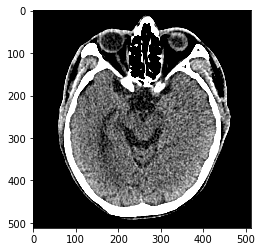

In [73]:
import matplotlib.pyplot as plt

plt.imshow(dicom_denormalize(t[470]['n_20'].squeeze()), 'gray', vmin=0, vmax=80)

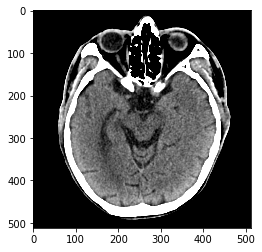

In [74]:
plt.imshow(dicom_denormalize(t[470]['n_100'].squeeze()), 'gray', vmin=0, vmax=80)

In [76]:
criterion(t[470]['n_100'], t[470]['n_20'])

tensor(0.0016, dtype=torch.float64)

In [64]:
class LogCoshLoss(torch.nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, y_t, y_prime_t):
        ey_t = y_t - y_prime_t
        return torch.mean(torch.log(torch.cosh(ey_t + 1e-12)))
#         return torch.mean(torch.log(torch.cosh(torch.pow(ey_t, 2))))

In [65]:
a = LogCoshLoss()

In [66]:
a(t[470]['n_100'], t[470]['n_20'])

tensor(2.1081e-06, dtype=torch.float64)

In [ ]:
4.1081e-06

In [ ]:
a(t[470]['n_100'], t[470]['n_20'])

In [63]:
a(t[470]['n_100'], t[470]['n_100'])

tensor(0., dtype=torch.float64)

In [68]:
1000*4.1081e-06 - 1000*2.1081e-06

0.0019999999999999996

In [ ]:
10

In [ ]:
20

# Log check

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt

def read_log(path):
    log_list = []
    lines = open(path, 'r').read().splitlines() 
    for i in range(len(lines)):
        exec('log_list.append('+lines[i] + ')')
    return  log_list

In [ ]:
log_list = read_log(path = '/workspace/sunggu/4.Dose_img2img/model/[Privious]ED_CNN/log.txt')

train_lr   = [ log_list[i]['train_lr'] for i in range(len(log_list)) ]
train_loss = [ log_list[i]['train_loss'] for i in range(len(log_list)) ]
valid_loss = [ log_list[i]['valid_loss'] for i in range(len(log_list)) ]
epoch      = [ log_list[i]['epoch'] for i in range(len(log_list)) ]

In [ ]:
plt.plot(train_loss)

In [ ]:
plt.plot(valid_loss)


In [ ]:
np.argsort(train_loss)[:10]

In [ ]:
np.argsort(valid_loss)[:10]

In [ ]:
set(np.argsort(valid_loss)[:10]) & set(np.argsort(train_loss)[:10])

# TEST

In [ ]:
!python test.py \
--training-mode 'sinogram' \
--data-set 'TEST_Sinogram_DCM' \
--model-name 'ED_CNN' \
--save_dir '/workspace/sunggu/4.Dose_img2img/Predictions/Test/png/[Privious]ED_CNN/epoch_999/' \
--num_workers 4 \
--pin-mem \
--range-minus1-plus1 'False' \
--teacher_forcing "False" \
--resume '/workspace/sunggu/4.Dose_img2img/model/[Privious]ED_CNN/epoch_999_checkpoint.pth'

##### 978 epoch

In [ ]:

Original === 
PSNR avg: 54.4628 
SSIM avg: 0.9956 
RMSE avg: 7.9607


Predictions === 
PSNR avg: 57.6190 
SSIM avg: 0.9980 
RMSE avg: 5.5423
***********************************************